# Interpretable ML Benchmark
NousNet (Fixed + Softmax Prototypes) vs XGBoost, EBM, MLP, KAN

#
Datasets:
- FICO HELOC (classification)
- Adult Income (classification)
- Breast Cancer (classification)
- California Housing (regression)

#
Protocol:
- 5-fold cross-validation (Stratified for classification, KFold for regression)
- Early stopping & best restore for neural models
- Fixed seeds (42)

#
Models:
- NousNet (Fixed rules)
- NousNet (Softmax rules + calibrators + prototype head for classification)
- XGBoost (trees + SHAP)
- EBM (InterpretML glassbox)
- MLP (PyTorch)
- KAN: piecewise-linear univariate bases + shallow Kolmogorov-Arnold composition

#
Interpretability:
- NousNet: honest LOO, MSE, fidelity-driven pruning, prototype analytics
- XGBoost: SHAP (global/local)
- EBM: global and local explanations
- MLP: permutation importance
- KAN: global importance from learned univariate bases + mixing

In [1]:
!pip install "nous[dev,examples] @ git+https://github.com/EmotionEngineer/nous@main"
!pip install interpret
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/EmotionEngineer/nous (to revision main) to /tmp/pip-install-hqtahse7/nous_024add0fe8744e379f47cf43f320c66f
  Running command git clone --filter=blob:none --quiet https://github.com/EmotionEngineer/nous /tmp/pip-install-hqtahse7/nous_024add0fe8744e379f47cf43f320c66f
  Resolved https://github.com/EmotionEngineer/nous to commit 608328f967895c47cbc511655b6c31d6fbe5c321
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^

[notice] A new release of pip is available: 24.2 -> 25.2
[n

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.3 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/13.2 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 6.3/13.2 MB 188.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 13.2/13.2 MB 196.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/363.4 MB ? eta -:--:--

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/363.4 MB 173.4 MB/s eta 0:00:03

   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/363.4 MB 167.5 MB/s eta 0:00:03

   ━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/363.4 MB 217.3 MB/s eta 0:00:02

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/363.4 MB 217.4 MB/s eta 0:00:02

   ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/363.4 MB 213.2 MB/s eta 0:00:02

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/363.4 MB 150.2 MB/s eta 0:00:03

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/363.4 MB 208.5 MB/s eta 0:00:02

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/363.4 MB 219.4 MB/s eta 0:00:02

   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/363.4 MB 216.0 MB/s eta 0:00:02

   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/363.4 MB 215.3 MB/s eta 0:00:02

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/363.4 MB 219.9 MB/s eta 0:00:02

   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/363.4 MB 220.6 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/363.4 MB 220.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 142.4/363.4 MB 221.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 157.0/363.4 MB 203.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 163.7/363.4 MB 192.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 178.9/363.4 MB 218.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 186.5/363.4 MB 219.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 201.9/363.4 MB 221.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 209.5/363.4 MB 220.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 224.8/363.4 MB 218.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 232.3/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 239.3/363.4 MB 209.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 251.8/363.4 MB 211.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 251.9/363.4 MB 111.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 252.1/363.4 MB 63.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 252.3/363.4 MB 53.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 256.2/363.4 MB 41.2 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 258.8/363.4 MB 37.7 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 272.1/363.4 MB 192.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 278.9/363.4 MB 193.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 292.4/363.4 MB 191.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 299.1/363.4 MB 194.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 305.8/363.4 MB 195.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 318.9/363.4 MB 184.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 325.4/363.4 MB 181.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 335.8/363.4 MB 152.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 342.5/363.4 MB 177.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 356.3/363.4 MB 199.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 363.4/363.4 MB 216.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/13.8 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 10.7/13.8 MB 155.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 12.3/13.8 MB 108.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/24.6 MB ? eta -:--:--

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/24.6 MB 221.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 19.9/24.6 MB 178.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 24.6/24.6 MB 188.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 24.6/24.6 MB 188.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/664.8 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/664.8 MB 213.8 MB/s eta 0:00:04

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/664.8 MB 206.8 MB/s eta 0:00:04

   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/664.8 MB 207.6 MB/s eta 0:00:04

   ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/664.8 MB 212.8 MB/s eta 0:00:03

   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/664.8 MB 216.6 MB/s eta 0:00:03

   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/664.8 MB 215.7 MB/s eta 0:00:03

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/664.8 MB 211.6 MB/s eta 0:00:03

   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/664.8 MB 213.4 MB/s eta 0:00:03

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/664.8 MB 193.4 MB/s eta 0:00:03

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/664.8 MB 194.2 MB/s eta 0:00:03

   ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/664.8 MB 188.2 MB/s eta 0:00:03

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/664.8 MB 188.6 MB/s eta 0:00:03

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/664.8 MB 192.9 MB/s eta 0:00:03

   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/664.8 MB 194.9 MB/s eta 0:00:03

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/664.8 MB 194.0 MB/s eta 0:00:03

   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/664.8 MB 194.3 MB/s eta 0:00:03

   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/664.8 MB 197.5 MB/s eta 0:00:03

   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/664.8 MB 197.2 MB/s eta 0:00:03

   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.3/664.8 MB 194.4 MB/s eta 0:00:03

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/664.8 MB 194.4 MB/s eta 0:00:03

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/664.8 MB 192.6 MB/s eta 0:00:03

   ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.6/664.8 MB 192.3 MB/s eta 0:00:03

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/664.8 MB 193.4 MB/s eta 0:00:03

   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/664.8 MB 192.4 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/664.8 MB 198.5 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/664.8 MB 193.1 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 268.0/664.8 MB 195.9 MB/s eta 0:00:03

   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 274.6/664.8 MB 195.8 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 288.1/664.8 MB 195.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 294.7/664.8 MB 190.7 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 307.5/664.8 MB 182.2 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 313.6/664.8 MB 177.6 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 319.8/664.8 MB 180.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 332.6/664.8 MB 183.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 339.0/664.8 MB 184.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 351.6/664.8 MB 182.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 357.9/664.8 MB 181.7 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 370.7/664.8 MB 184.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 376.9/664.8 MB 184.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 389.4/664.8 MB 181.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 395.6/664.8 MB 180.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 402.1/664.8 MB 186.1 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 414.4/664.8 MB 175.9 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 420.6/664.8 MB 180.1 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 433.4/664.8 MB 186.1 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 439.7/664.8 MB 184.4 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 452.3/664.8 MB 182.0 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━ 458.6/664.8 MB 182.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 471.4/664.8 MB 183.8 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 477.5/664.8 MB 181.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 483.9/664.8 MB 182.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 496.5/664.8 MB 183.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 502.6/664.8 MB 178.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 515.4/664.8 MB 185.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 521.5/664.8 MB 180.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 534.3/664.8 MB 185.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 540.7/664.8 MB 185.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 553.6/664.8 MB 187.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 560.1/664.8 MB 188.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 572.6/664.8 MB 180.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 578.8/664.8 MB 177.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━ 585.2/664.8 MB 182.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 599.2/664.8 MB 209.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 606.7/664.8 MB 215.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 621.8/664.8 MB 218.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 629.4/664.8 MB 219.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 644.7/664.8 MB 218.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 652.3/664.8 MB 218.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 659.8/664.8 MB 216.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 224.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/211.5 MB ? eta -:--:--

   ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/211.5 MB 127.0 MB/s eta 0:00:02

   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/211.5 MB 189.1 MB/s eta 0:00:02

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/211.5 MB 187.3 MB/s eta 0:00:02

   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/211.5 MB 150.3 MB/s eta 0:00:02

   ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/211.5 MB 157.9 MB/s eta 0:00:02

   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/211.5 MB 185.0 MB/s eta 0:00:01

   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/211.5 MB 183.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/211.5 MB 184.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/211.5 MB 199.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/211.5 MB 160.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 94.2/211.5 MB 183.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 100.8/211.5 MB 190.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 112.8/211.5 MB 180.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 119.1/211.5 MB 170.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 132.0/211.5 MB 185.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━ 138.2/211.5 MB 183.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 151.0/211.5 MB 185.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 157.3/211.5 MB 184.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━ 164.5/211.5 MB 200.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 174.7/211.5 MB 144.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━ 182.1/211.5 MB 216.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 197.1/211.5 MB 215.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 199.2/211.5 MB 140.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 210.0/211.5 MB 154.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 211.5/211.5 MB 208.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/56.3 MB 202.7 MB/s eta 0:00:01

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/56.3 MB 189.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/56.3 MB 193.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 30.6/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 30.8/56.3 MB 107.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 39.5/56.3 MB 83.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 46.1/56.3 MB 190.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.3/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.3/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.3/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.3/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 56.3/56.3 MB 207.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00


   ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/127.9 MB 200.9 MB/s eta 0:00:01

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/127.9 MB 210.7 MB/s eta 0:00:01

   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/127.9 MB 218.0 MB/s eta 0:00:01

   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/127.9 MB 218.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━ 51.9/127.9 MB 220.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 59.8/127.9 MB 224.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━ 67.2/127.9 MB 220.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━ 80.8/127.9 MB 188.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 87.9/127.9 MB 211.7 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 100.5/127.9 MB 174.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 107.1/127.9 MB 172.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 116.0/127.9 MB 131.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 120.6/127.9 MB 124.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 127.9/127.9 MB 189.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/207.5 MB ? eta -:--:--

   ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/207.5 MB 207.5 MB/s eta 0:00:01

   ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/207.5 MB 211.9 MB/s eta 0:00:01

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/207.5 MB 212.1 MB/s eta 0:00:01

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/207.5 MB 217.3 MB/s eta 0:00:01

   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/207.5 MB 217.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/207.5 MB 217.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/207.5 MB 217.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 86.4/207.5 MB 224.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 87.0/207.5 MB 109.5 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 94.3/207.5 MB 106.9 MB/s eta 0:00:02

   ━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 109.6/207.5 MB 220.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━ 117.1/207.5 MB 216.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 132.4/207.5 MB 219.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 139.8/207.5 MB 218.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━ 155.1/207.5 MB 219.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━ 162.5/207.5 MB 214.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 177.5/207.5 MB 212.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 185.0/207.5 MB 216.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 192.5/207.5 MB 216.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 207.5/207.5 MB 225.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/21.1 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 14.1/21.1 MB 204.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 21.1/21.1 MB 217.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.7 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 16.3 MB/s eta 0:00:00


  Created wheel for nous: filename=nous-0.2.0-py3-none-any.whl size=43789 sha256=a986bbe8ead0ecaa5feeb0777062dd2c0a52a2d633a5d0208e0e6368d891a006
  Stored in directory: /tmp/pip-ephem-wheel-cache-dcv6fscu/wheels/5c/d9/99/a5c8f301bd5928ee051cc5c7535892bdf567557bb0affb43ab
Successfully built nous


  Attempting uninstall: nvidia-nvjitlink-cu12


    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:


      Successfully uninstalled nvidia-nvjitlink-cu12-12.5.82


  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.6.82


    Uninstalling nvidia-curand-cu12-10.3.6.82:


      Successfully uninstalled nvidia-curand-cu12-10.3.6.82


  Attempting uninstall: nvidia-cufft-cu12


    Found existing installation: nvidia-cufft-cu12 11.2.3.61
    Uninstalling nvidia-cufft-cu12-11.2.3.61:


      Successfully uninstalled nvidia-cufft-cu12-11.2.3.61


  Attempting uninstall: nvidia-cuda-runtime-cu12


    Found existing installation: nvidia-cuda-runtime-cu12 12.5.82
    Uninstalling nvidia-cuda-runtime-cu12-12.5.82:


      Successfully uninstalled nvidia-cuda-runtime-cu12-12.5.82


  Attempting uninstall: nvidia-cuda-nvrtc-cu12
    Found existing installation: nvidia-cuda-nvrtc-cu12 12.5.82
    Uninstalling nvidia-cuda-nvrtc-cu12-12.5.82:


      Successfully uninstalled nvidia-cuda-nvrtc-cu12-12.5.82


  Attempting uninstall: nvidia-cuda-cupti-cu12
    Found existing installation: nvidia-cuda-cupti-cu12 12.5.82
    Uninstalling nvidia-cuda-cupti-cu12-12.5.82:


      Successfully uninstalled nvidia-cuda-cupti-cu12-12.5.82


  Attempting uninstall: nvidia-cublas-cu12
    Found existing installation: nvidia-cublas-cu12 12.5.3.2
    Uninstalling nvidia-cublas-cu12-12.5.3.2:


      Successfully uninstalled nvidia-cublas-cu12-12.5.3.2


  Attempting uninstall: coverage


    Found existing installation: coverage 7.9.1
    Uninstalling coverage-7.9.1:


      Successfully uninstalled coverage-7.9.1


  Attempting uninstall: nvidia-cusparse-cu12


    Found existing installation: nvidia-cusparse-cu12 12.5.1.3
    Uninstalling nvidia-cusparse-cu12-12.5.1.3:


      Successfully uninstalled nvidia-cusparse-cu12-12.5.1.3


  Attempting uninstall: nvidia-cudnn-cu12


    Found existing installation: nvidia-cudnn-cu12 9.3.0.75
    Uninstalling nvidia-cudnn-cu12-9.3.0.75:


      Successfully uninstalled nvidia-cudnn-cu12-9.3.0.75


  Attempting uninstall: nvidia-cusolver-cu12


    Found existing installation: nvidia-cusolver-cu12 11.6.3.83
    Uninstalling nvidia-cusolver-cu12-11.6.3.83:


      Successfully uninstalled nvidia-cusolver-cu12-11.6.3.83


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 4.0/4.0 MB 179.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 84.9 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00


  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/16.5 MB ? eta -:--:--

   ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/16.5 MB 150.6 MB/s eta 0:00:01

   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/16.5 MB 67.5 MB/s eta 0:00:01

   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/16.5 MB 37.0 MB/s eta 0:00:01

   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/16.5 MB 27.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/16.5 MB 20.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 9.4/16.5 MB 34.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 16.5/16.5 MB 174.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 91.0 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.0 MB ? eta -:--:--

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/7.0 MB 245.3 MB/s eta 0:00:01

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/7.0 MB 245.3 MB/s eta 0:00:01

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/7.0 MB 245.3 MB/s eta 0:00:01

   ━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/7.0 MB 245.3 MB/s eta 0:00:01

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/7.0 MB 9.8 MB/s eta 0:00:01

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/7.0 MB 9.8 MB/s eta 0:00:01

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/7.0 MB 9.8 MB/s eta 0:00:01

   ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/7.0 MB 9.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/7.0 MB 5.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 3.1/7.0 MB 6.9 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.2/7.0 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.2/7.0 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.2/7.0 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.2/7.0 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 4.2/7.0 MB 3.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 5.2/7.0 MB 3.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 5.2/7.0 MB 3.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 5.2/7.0 MB 3.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 5.2/7.0 MB 3.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━ 5.2/7.0 MB 3.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 6.3/7.0 MB 3.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.0/7.0 MB 2.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.2 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.1 MB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/778.9 kB ? eta -:--:--

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.3 MB/s eta 0:00:00


Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.8 MB/s eta 0:00:00


  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=4010717 sha256=b9b0beb7129cef3e56f1d7037c7f33516b11c586f8dd3104957635595b308364
  Stored in directory: /root/.cache/pip/wheels/99/b1/ab/6c999ab288b4849d372e23c0a8f6ece7edb7ffeb8c97959ab0
Successfully built dash-cytoscape


  Attempting uninstall: Werkzeug


    Found existing installation: Werkzeug 3.1.3


    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


  Attempting uninstall: setuptools


    Found existing installation: setuptools 75.2.0


    Uninstalling setuptools-75.2.0:


      Successfully uninstalled setuptools-75.2.0


  Attempting uninstall: Flask


    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:


      Successfully uninstalled Flask-3.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 4.9 MB/s eta 0:00:00


In [2]:
# Imports
import os
import time
import random
import numpy as np
import pandas as pd
from typing import Optional, Tuple, Dict, Any, List
import sys, subprocess, importlib

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score,
)
from sklearn.datasets import load_breast_cancer, fetch_california_housing

import shap
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier, ExplainableBoostingRegressor

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Nous
from nous import (
    NousNet,
    rule_impact_df,
    minimal_sufficient_explanation,
    select_pruning_threshold_global_bs,
    generate_enhanced_explanation,
    explanation_fidelity_metrics,
    aggregator_mixture_report,
    set_global_seed,
)
from nous.explain.traces import (
    prototype_report_global,
    prototype_contribution_df,
    describe_prototype,
)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

Device: cuda


## Utilities

In [3]:
def seed_everything(seed: int = 42):
    set_global_seed(seed)
    random.seed(seed)

def rmse(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def safe_auc(y_true: np.ndarray, proba: np.ndarray) -> float:
    """
    Robust ROC AUC:
      - Binary: use positive-class prob (proba[:, 1]) if available or 1D scores.
      - Multiclass: use multi_class='ovr' with 2D proba.
      - Returns np.nan on any mismatch or failure.
    """
    y_true = np.asarray(y_true)
    if proba is None:
        return np.nan
    proba = np.asarray(proba)
    try:
        classes = np.unique(y_true)
        if len(classes) == 2:
            if proba.ndim == 2 and proba.shape[1] >= 2:
                return roc_auc_score(y_true, proba[:, 1])
            elif proba.ndim == 1:
                return roc_auc_score(y_true, proba)
            else:
                return np.nan
        else:
            if proba.ndim == 2 and proba.shape[1] >= 2:
                return roc_auc_score(y_true, proba, multi_class="ovr")
            return np.nan
    except Exception:
        return np.nan

# Simple PyTorch MLP with early stopping
class MLPNet(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, hidden: Tuple[int, ...] = (128, 64), task_type: str = "classification"):
        super().__init__()
        layers = []
        dims = [input_dim] + list(hidden)
        for i in range(len(dims) - 1):
            layers.extend([nn.Linear(dims[i], dims[i+1]), nn.ReLU()])
        layers.append(nn.Linear(dims[-1], output_dim))
        self.net = nn.Sequential(*layers)
        self.task = task_type

    def forward(self, x):
        return self.net(x)

def train_mlp(
    X_train: np.ndarray, y_train: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    task_type: str, max_epochs: int = 1000, patience: int = 200, lr: float = 1e-3, weight_decay: float = 1e-4,
    batch_size: int = 128
) -> Tuple[MLPNet, float]:
    seed_everything(42)
    in_dim = X_train.shape[1]
    out_dim = len(np.unique(y_train)) if task_type == "classification" else 1

    model = MLPNet(in_dim, out_dim, hidden=(128, 64), task_type=task_type).to(DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    if task_type == "classification":
        criterion = nn.CrossEntropyLoss()
        ytr_t = torch.tensor(y_train, dtype=torch.long)
        yval_t = torch.tensor(y_val, dtype=torch.long)
    else:
        criterion = nn.SmoothL1Loss(beta=1.0)
        ytr_t = torch.tensor(y_train, dtype=torch.float32)
        yval_t = torch.tensor(y_val, dtype=torch.float32)

    Xtr_t = torch.tensor(X_train, dtype=torch.float32)
    Xval_t = torch.tensor(X_val, dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(Xval_t, yval_t), batch_size=batch_size)

    best_val = float("inf")
    best_state = None
    epochs_no_improve = 0

    for epoch in range(max_epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            if task_type == "classification":
                loss = criterion(out, yb)
            else:
                out = out.squeeze(-1)
                loss = criterion(out, yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 0.5)
            optimizer.step()

        # val
        model.eval()
        total_val = 0.0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                out = model(xb)
                if task_type == "classification":
                    vloss = criterion(out, yb)
                else:
                    vloss = criterion(out.squeeze(-1), yb)
                total_val += float(vloss.item())
        avg_val = total_val / max(1, len(val_loader))

        if avg_val < best_val - 1e-6:
            best_val = avg_val
            epochs_no_improve = 0
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    if best_state:
        model.load_state_dict(best_state)
    return model, best_val

def predict_mlp(model: MLPNet, X: np.ndarray, task_type: str):
    model.eval()
    with torch.no_grad():
        X_t = torch.tensor(X, dtype=torch.float32).to(DEVICE)
        logits = model(X_t)
        if task_type == "classification":
            probs = F.softmax(logits, dim=-1).cpu().numpy()
            return probs
        else:
            preds = logits.squeeze(-1).cpu().numpy()
            return preds

## Datasets
- HELOC: replace -9 with NaN, median-impute, standardize.
- Adult: one-hot categoricals, impute, standardize.
- Breast Cancer: standardize.
- California Housing: standardize.

In [4]:
def load_heloc() -> Tuple[pd.DataFrame, pd.Series, List[str], List[str]]:
    urls = [
        "https://raw.githubusercontent.com/benoitparis/explainable-challenge/refs/heads/master/heloc_dataset_v1.csv",
    ]
    df = None
    for u in urls:
        try:
            df = pd.read_csv(u)
            print(f"Loaded HELOC from {u}")
            break
        except Exception as e:
            print(f"Failed to load from {u}: {e}")
    if df is None:
        local = os.environ.get("HELCO_CSV_PATH") or os.environ.get("HELOC_CSV_PATH")
        if local and os.path.exists(local):
            df = pd.read_csv(local)
            print(f"Loaded HELOC from local file {local}")
        else:
            raise FileNotFoundError("Cannot load HELOC dataset from mirrors. Set HELCO_CSV_PATH to local csv.")

    target_col = "RiskPerformance"
    y_raw = df[target_col].astype(str).values
    y = (y_raw == "Bad").astype(int)  # Bad=1, Good=0
    X = df.drop(columns=[target_col]).copy()
    X = X.replace(-9, np.nan)

    num_cols = X.columns.tolist()
    ct = ColumnTransformer(
        transformers=[("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols)],
        remainder="drop"
    )
    X_proc = ct.fit_transform(X)
    Xp = pd.DataFrame(X_proc, columns=num_cols)
    class_names = ["Good", "Bad"]
    return Xp, pd.Series(y), num_cols, class_names

def load_adult() -> Tuple[pd.DataFrame, pd.Series, List[str], List[str]]:
    from sklearn.datasets import fetch_openml
    adult = fetch_openml("adult", version=2, as_frame=True, parser="auto")
    df = adult.frame.copy()
    target = "class"
    y_raw = df[target].astype(str)
    y = (y_raw.str.contains(">50K")).astype(int)
    X = df.drop(columns=[target])

    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = [c for c in X.columns if c not in cat_cols]

    preprocess = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ]), cat_cols)
        ]
    )
    Xp = preprocess.fit_transform(X)
    cat_features = preprocess.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_cols) if cat_cols else []
    feature_names = num_cols + list(cat_features)
    Xp = pd.DataFrame(Xp, columns=feature_names)
    class_names = ["<=50K", ">50K"]
    return Xp, pd.Series(y), feature_names, class_names

def load_breast_cancer_ds() -> Tuple[pd.DataFrame, pd.Series, List[str], List[str]]:
    data = load_breast_cancer(as_frame=True)
    X = data.frame.drop(columns=["target"])
    y = data.frame["target"]
    num_cols = X.columns.tolist()
    ct = ColumnTransformer(
        transformers=[("num", Pipeline([
            ("scaler", StandardScaler())
        ]), num_cols)]
    )
    Xp = ct.fit_transform(X)
    Xp = pd.DataFrame(Xp, columns=num_cols)
    class_names = list(data.target_names)
    return Xp, y, num_cols, class_names

def load_california() -> Tuple[pd.DataFrame, pd.Series, List[str]]:
    data = fetch_california_housing(as_frame=True)
    X = data.frame.drop(columns=["MedHouseVal"])
    y = data.frame["MedHouseVal"]
    num_cols = X.columns.tolist()
    ct = ColumnTransformer(
        transformers=[("num", Pipeline([
            ("scaler", StandardScaler())
        ]), num_cols)]
    )
    Xp = ct.fit_transform(X)
    Xp = pd.DataFrame(Xp, columns=num_cols)
    return Xp, y, num_cols

## KAN
- Two-stage Kolmogorov-Arnold-like network:
  - Stage 1: univariate piecewise-linear bases per feature → u_j(x_j)
  - Linear mixing s_r = Σ_j A[r,j] u_j
  - Stage 2: univariate piecewise-linear bases over s_r → g_r(s_r)
  - Output: y = W_out · g + b
- Classification: logits dimension C; Regression: scalar.
- Interpretability: report global feature importance via |W1| · |A| · |W_out|.

In [5]:
class TentBasis1D(nn.Module):
    """
    Triangular (tent) basis over 1D input:
      phi_k(x) = relu(1 - |x - c_k| / h), with centers c_k and bandwidth h.
    """
    def __init__(self, centers: torch.Tensor, bandwidth: float = 1.0):
        super().__init__()
        self.register_buffer("centers", centers.clone().detach())  # [K]
        self.bandwidth = float(bandwidth)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: [B] -> returns [B, K]
        x = x.unsqueeze(-1)  # [B, 1]
        dist = torch.abs(x - self.centers)  # [B, K]
        return torch.relu(1.0 - dist / (self.bandwidth + 1e-8))


class ManualKAN(nn.Module):
    """
    Manual KAN-like model with:
      - per-feature univariate tent bases (K1 centers over standardized features),
      - linear mixing to M units,
      - per-unit univariate tent bases over s_r (K2 centers),
      - linear head to C classes (classification) or scalar (regression).
    """
    def __init__(
        self,
        input_dim: int,
        task_type: str = "classification",
        num_classes: int = 2,
        K1: int = 8,      # basis per feature
        K2: int = 8,      # basis per hidden unit
        M: int = 16,      # number of hidden units
        span1: Tuple[float, float] = (-3.0, 3.0),  # feature range
        span2: Tuple[float, float] = (-3.0, 3.0),  # s_r range
        bandwidth1: float = 1.0,
        bandwidth2: float = 1.0,
    ):
        super().__init__()
        self.D = input_dim
        self.task = task_type
        self.C = num_classes if task_type == "classification" else 1
        self.K1 = K1
        self.K2 = K2
        self.M = M

        c1 = torch.linspace(span1[0], span1[1], K1)
        self.bases1 = nn.ModuleList([TentBasis1D(c1, bandwidth=bandwidth1) for _ in range(self.D)])  # one basis per feature
        self.W1 = nn.Parameter(torch.randn(self.D, K1) * 0.1)     # [D, K1] -> u_j

        self.A = nn.Parameter(torch.randn(M, self.D) * 0.1)       # mixing to s_r

        c2 = torch.linspace(span2[0], span2[1], K2)
        self.basis2 = TentBasis1D(c2, bandwidth=bandwidth2)       # shared basis over s_r
        self.W2 = nn.Parameter(torch.randn(M, K2) * 0.1)          # [M, K2] -> g_r

        self.W_out = nn.Parameter(torch.randn(M, self.C) * 0.1)   # [M, C]
        self.b_out = nn.Parameter(torch.zeros(self.C))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: [B, D]
        B = x.size(0)
        # Stage 1: per-feature u_j
        U = []
        for j in range(self.D):
            phi = self.bases1[j](x[:, j])  # [B, K1]
            u_j = phi @ self.W1[j].unsqueeze(-1)  # [B, 1]
            U.append(u_j.squeeze(-1))
        U = torch.stack(U, dim=1)  # [B, D]

        # Mix to s_r
        S = U @ self.A.t()  # [B, M]

        # Stage 2: per-unit g_r
        G = []
        for r in range(self.M):
            phi2 = self.basis2(S[:, r])            # [B, K2]
            g_r = (phi2 @ self.W2[r].unsqueeze(-1)).squeeze(-1)  # [B]
            G.append(g_r)
        G = torch.stack(G, dim=1)  # [B, M]

        # Head
        logits = G @ self.W_out + self.b_out  # [B, C]
        if self.task == "classification":
            return logits
        else:
            return logits.squeeze(-1)  # [B]

    @torch.no_grad()
    def global_importance(self) -> np.ndarray:
        """
        Crude global importance per feature j:
          |W1_j| summed across K1, multiplied by |A[:, j]| and |W_out| aggregated.
        Returns: [D] importance.
        """
        w1 = self.W1.abs().sum(dim=1).cpu().numpy()          # [D]
        a = self.A.abs().cpu().numpy()                       # [M, D]
        wout = self.W_out.abs().sum(dim=1, keepdim=True).cpu().numpy()  # [M,1]
        # propagate importance through A then head
        imp_m = (a * wout).sum(axis=0)   # [D]
        return (w1 * imp_m)


def train_manual_kan(
    X_train: np.ndarray, y_train: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    task_type: str,
    num_classes: int,
    K1: int = 8, K2: int = 8, M: int = 16,
    lr: float = 3e-3, weight_decay: float = 1e-4,
    max_epochs: int = 300, patience: int = 50, batch_size: int = 128
) -> Tuple[ManualKAN, float]:
    seed_everything(42)
    D = X_train.shape[1]
    model = ManualKAN(
        input_dim=D, task_type=task_type, num_classes=num_classes,
        K1=K1, K2=K2, M=M, span1=(-3,3), span2=(-3,3),
        bandwidth1=1.0, bandwidth2=1.0
    ).to(DEVICE)

    if task_type == "classification":
        criterion = nn.CrossEntropyLoss()
        ytr_t = torch.tensor(y_train, dtype=torch.long)
        yval_t = torch.tensor(y_val, dtype=torch.long)
    else:
        criterion = nn.SmoothL1Loss(beta=1.0)
        ytr_t = torch.tensor(y_train, dtype=torch.float32)
        yval_t = torch.tensor(y_val, dtype=torch.float32)

    Xtr_t = torch.tensor(X_train, dtype=torch.float32)
    Xval_t = torch.tensor(X_val, dtype=torch.float32)

    train_loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(Xval_t, yval_t), batch_size=batch_size)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    best_val = float("inf")
    best_state = None
    epochs_no_improve = 0

    for epoch in range(max_epochs):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            if task_type == "classification":
                loss = criterion(out, yb)
            else:
                loss = criterion(out, yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 0.5)
            optimizer.step()

        # validation
        model.eval()
        total_val = 0.0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                out = model(xb)
                vloss = criterion(out, yb)
                total_val += float(vloss.item())
        avg_val = total_val / max(1, len(val_loader))

        if avg_val < best_val - 1e-6:
            best_val = avg_val
            epochs_no_improve = 0
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    if best_state:
        model.load_state_dict(best_state)
    return model, best_val

def predict_manual_kan(model: ManualKAN, X: np.ndarray, task_type: str) -> np.ndarray:
    model.eval()
    with torch.no_grad():
        Xt = torch.tensor(X, dtype=torch.float32).to(DEVICE)
        out = model(Xt)
        if task_type == "classification":
            probs = F.softmax(out, dim=-1).cpu().numpy()
            return probs
        else:
            preds = out.cpu().numpy()
            return preds

## Model runners (NousNet, XGBoost, EBM, MLP, KAN)

In [6]:
def fit_nous(
    X_tr: np.ndarray, y_tr: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    X_te: np.ndarray,
    feature_names: List[str],
    task_type: str,
    epochs: int = 1000, patience: int = 200, batch_size: int = 64, lr: float = 1e-3,
    rule_method: str = "softmax",
    use_calibrators: bool = True,
    use_prototypes: bool = False,
) -> Tuple[np.ndarray, Dict[str, Any]]:
    seed_everything(42)
    input_dim = X_tr.shape[1]
    if task_type == "classification":
        num_outputs = int(len(np.unique(y_tr)))
    else:
        num_outputs = 1

    model = NousNet(
        input_dim=input_dim, num_outputs=num_outputs, task_type=task_type,
        feature_names=feature_names,
        num_facts=32 if task_type=="classification" else 64,
        rules_per_layer=(16, 8) if task_type=="classification" else (32, 16),
        rule_selection_method=rule_method, use_calibrators=use_calibrators,
        use_prototypes=(use_prototypes and task_type=="classification")
    )

    Xtr_t = torch.tensor(X_tr, dtype=torch.float32)
    Xval_t = torch.tensor(X_val, dtype=torch.float32)
    Xte_t = torch.tensor(X_te, dtype=torch.float32)

    if task_type == "classification":
        ytr_t = torch.tensor(y_tr, dtype=torch.long)
        yval_t = torch.tensor(y_val, dtype=torch.long)
        criterion = nn.CrossEntropyLoss()
    else:
        ytr_t = torch.tensor(y_tr, dtype=torch.float32)
        yval_t = torch.tensor(y_val, dtype=torch.float32)
        criterion = nn.SmoothL1Loss(beta=1.0)

    train_loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(Xval_t, yval_t), batch_size=batch_size)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)

    from nous.training import train_model as nous_train
    best_val = nous_train(
        model, train_loader, val_loader, criterion, optimizer,
        epochs=epochs, patience=patience, device=DEVICE,
    )

    # Predict
    model.eval()
    with torch.no_grad():
        out = model(Xte_t.to(DEVICE))
        if task_type == "classification":
            probs = F.softmax(out, dim=-1).cpu().numpy()
            return probs, {"model": model, "best_val": best_val}
        else:
            preds = out.cpu().numpy().ravel()
            return preds, {"model": model, "best_val": best_val}

def fit_xgboost(
    X_tr: np.ndarray, y_tr: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    X_te: np.ndarray, task_type: str
) -> np.ndarray:
    seed_everything(42)
    if task_type == "classification":
        num_classes = int(len(np.unique(y_tr)))
        metric = "mlogloss" if num_classes > 2 else "logloss"
        model = xgb.XGBClassifier(
            n_estimators=5000, learning_rate=0.02, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
            random_state=42, tree_method="hist", n_jobs=0,
            eval_metric=metric, early_stopping_rounds=100
        )
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        return model.predict_proba(X_te)
    else:
        model = xgb.XGBRegressor(
            n_estimators=5000, learning_rate=0.02, max_depth=6,
            subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
            random_state=42, tree_method="hist", n_jobs=0,
            eval_metric="rmse", early_stopping_rounds=100
        )
        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
        return model.predict(X_te)

def fit_ebm(
    X_tr: np.ndarray, y_tr: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    X_te: np.ndarray, task_type: str
) -> Tuple[np.ndarray, Any]:
    seed_everything(42)
    if task_type == "classification":
        ebm = ExplainableBoostingClassifier(
            interactions=0,
            outer_bags=8,
            inner_bags=4,
            learning_rate=0.05,
            max_leaves=3,
            max_bins=255,
            random_state=42,
        )
        ebm.fit(X_tr, y_tr)
        proba = ebm.predict_proba(X_te)
        return proba, ebm
    else:
        ebm = ExplainableBoostingRegressor(
            interactions=0,
            outer_bags=8,
            inner_bags=4,
            learning_rate=0.05,
            max_leaves=3,
            max_bins=255,
            random_state=42,
        )
        ebm.fit(X_tr, y_tr)
        preds = ebm.predict(X_te)
        return preds, ebm

## Cross-validation (5-fold)
NousNet variants:
- NousNet (Fixed): rule_selection_method='fixed', use_calibrators=False
- NousNet (Softmax+Proto): rule_selection_method='softmax', use_calibrators=True, use_prototypes=True (classification)
Additional baselines: XGBoost, EBM, MLP, KAN.

In [7]:
def run_cv_benchmark(
    X: pd.DataFrame, y: pd.Series, feature_names: List[str], class_names: Optional[List[str]],
    dataset_name: str, task_type: str,
    n_splits: int = 5
) -> pd.DataFrame:
    seed_everything(42)
    Xv = X.values.astype(np.float32)
    yv = y.values

    if task_type == "classification":
        cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    else:
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    rows = []
    fold = 0
    for tr_idx, te_idx in cv.split(Xv, yv if task_type=="classification" else None):
        fold += 1
        X_tr_full, X_te = Xv[tr_idx], Xv[te_idx]
        y_tr_full, y_te = yv[tr_idx], yv[te_idx]

        # Inner validation split
        if task_type == "classification":
            X_tr, X_val, y_tr, y_val = train_test_split(
                X_tr_full, y_tr_full, test_size=0.15, random_state=42, stratify=y_tr_full
            )
        else:
            X_tr, X_val, y_tr, y_val = train_test_split(
                X_tr_full, y_tr_full, test_size=0.15, random_state=42
            )

        # NousNet (Fixed)
        t0 = time.time()
        if task_type == "classification":
            y_nf_proba, _ = fit_nous(
                X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="classification",
                epochs=1000, patience=200, batch_size=64, lr=1e-3,
                rule_method="fixed", use_calibrators=False, use_prototypes=False
            )
            y_nf = np.argmax(y_nf_proba, axis=1)
            acc = accuracy_score(y_te, y_nf)
            auc = safe_auc(y_te, y_nf_proba)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Fixed)", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Fixed)", "metric": "AUC", "value": auc, "time_s": dur})
        else:
            y_nf, _ = fit_nous(
                X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="regression",
                epochs=1000, patience=200, batch_size=64, lr=1e-3,
                rule_method="fixed", use_calibrators=False, use_prototypes=False
            )
            rm = rmse(y_te, y_nf)
            mae = mean_absolute_error(y_te, y_nf)
            r2 = r2_score(y_te, y_nf)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Fixed)", "metric": "RMSE", "value": rm, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Fixed)", "metric": "MAE", "value": mae, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Fixed)", "metric": "R2", "value": r2, "time_s": dur})

        # NousNet (Softmax+Proto for classification)
        t0 = time.time()
        if task_type == "classification":
            y_ns_proba, _ = fit_nous(
                X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="classification",
                epochs=1000, patience=200, batch_size=64, lr=1e-3,
                rule_method="softmax", use_calibrators=True, use_prototypes=True
            )
            y_ns = np.argmax(y_ns_proba, axis=1)
            acc = accuracy_score(y_te, y_ns)
            auc = safe_auc(y_te, y_ns_proba)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Softmax+Proto)", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Softmax+Proto)", "metric": "AUC", "value": auc, "time_s": dur})
        else:
            y_ns, _ = fit_nous(
                X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="regression",
                epochs=1000, patience=200, batch_size=64, lr=1e-3,
                rule_method="softmax", use_calibrators=True, use_prototypes=False
            )
            rm = rmse(y_te, y_ns)
            mae = mean_absolute_error(y_te, y_ns)
            r2 = r2_score(y_te, y_ns)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Softmax)", "metric": "RMSE", "value": rm, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Softmax)", "metric": "MAE", "value": mae, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "NousNet (Softmax)", "metric": "R2", "value": r2, "time_s": dur})

        # XGBoost
        t0 = time.time()
        yhat_xgb = fit_xgboost(X_tr, y_tr, X_val, y_val, X_te, task_type)
        dur = time.time() - t0
        if task_type == "classification":
            y_pred = np.argmax(yhat_xgb, axis=1)
            acc = accuracy_score(y_te, y_pred)
            auc = safe_auc(y_te, yhat_xgb)
            rows.append({"dataset": dataset_name, "fold": fold, "model": "XGBoost", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "XGBoost", "metric": "AUC", "value": auc, "time_s": dur})
        else:
            rm = rmse(y_te, yhat_xgb)
            mae = mean_absolute_error(y_te, yhat_xgb)
            r2 = r2_score(y_te, yhat_xgb)
            rows.append({"dataset": dataset_name, "fold": fold, "model": "XGBoost", "metric": "RMSE", "value": rm, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "XGBoost", "metric": "MAE", "value": mae, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "XGBoost", "metric": "R2", "value": r2, "time_s": dur})

        # EBM
        t0 = time.time()
        yhat_ebm, ebm_model = fit_ebm(X_tr, y_tr, X_val, y_val, X_te, task_type)
        dur = time.time() - t0
        if task_type == "classification":
            y_pred = np.argmax(yhat_ebm, axis=1)
            acc = accuracy_score(y_te, y_pred)
            auc = safe_auc(y_te, yhat_ebm)
            rows.append({"dataset": dataset_name, "fold": fold, "model": "EBM", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "EBM", "metric": "AUC", "value": auc, "time_s": dur})
        else:
            rm = rmse(y_te, yhat_ebm)
            mae = mean_absolute_error(y_te, yhat_ebm)
            r2 = r2_score(y_te, yhat_ebm)
            rows.append({"dataset": dataset_name, "fold": fold, "model": "EBM", "metric": "RMSE", "value": rm, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "EBM", "metric": "MAE", "value": mae, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "EBM", "metric": "R2", "value": r2, "time_s": dur})

        # MLP
        t0 = time.time()
        mlp_model, _ = train_mlp(X_tr, y_tr, X_val, y_val, task_type, max_epochs=1000, patience=200, lr=1e-3, batch_size=64)
        yhat_mlp = predict_mlp(mlp_model, X_te, task_type)
        dur = time.time() - t0
        if task_type == "classification":
            y_pred = np.argmax(yhat_mlp, axis=1)
            acc = accuracy_score(y_te, y_pred)
            auc = safe_auc(y_te, yhat_mlp)
            rows.append({"dataset": dataset_name, "fold": fold, "model": "MLP", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "MLP", "metric": "AUC", "value": auc, "time_s": dur})
        else:
            y_pred = yhat_mlp
            rows.append({"dataset": dataset_name, "fold": fold, "model": "MLP", "metric": "RMSE", "value": rmse(y_te, y_pred), "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "MLP", "metric": "MAE", "value": mean_absolute_error(y_te, y_pred), "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "MLP", "metric": "R2", "value": r2_score(y_te, y_pred), "time_s": dur})

        # KAN (binary classification or regression)
        t0 = time.time()
        if task_type == "classification" and len(np.unique(y_tr)) == 2:
            kan_model, _ = train_manual_kan(
                X_tr, y_tr, X_val, y_val, task_type="classification",
                num_classes=2, K1=8, K2=8, M=16, lr=3e-3, weight_decay=1e-4, max_epochs=300, patience=50, batch_size=64
            )
            yhat_kan = predict_manual_kan(kan_model, X_te, "classification")
            acc = accuracy_score(y_te, np.argmax(yhat_kan, axis=1))
            auc = safe_auc(y_te, yhat_kan)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "KAN", "metric": "Accuracy", "value": acc, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "KAN", "metric": "AUC", "value": auc, "time_s": dur})
        elif task_type == "regression":
            kan_model, _ = train_manual_kan(
                X_tr, y_tr, X_val, y_val, task_type="regression",
                num_classes=1, K1=8, K2=8, M=16, lr=3e-3, weight_decay=1e-4, max_epochs=300, patience=50, batch_size=64
            )
            yhat_kan = predict_manual_kan(kan_model, X_te, "regression")
            rm = rmse(y_te, yhat_kan)
            mae = mean_absolute_error(y_te, yhat_kan)
            r2 = r2_score(y_te, yhat_kan)
            dur = time.time() - t0
            rows.append({"dataset": dataset_name, "fold": fold, "model": "KAN", "metric": "RMSE", "value": rm, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "KAN", "metric": "MAE", "value": mae, "time_s": dur})
            rows.append({"dataset": dataset_name, "fold": fold, "model": "KAN", "metric": "R2", "value": r2, "time_s": dur})

    df = pd.DataFrame(rows)
    return df

## Run 5-fold CV on all datasets

In [8]:
seed_everything(42)
results = []

# HELOC
try:
    Xh, yh, f_h, c_h = load_heloc()
    print("\n=== HELOC (classification) ===")
    res_h = run_cv_benchmark(Xh, yh, f_h, c_h, dataset_name="HELOC", task_type="classification", n_splits=5)
    results.append(res_h)
except Exception as e:
    print("HELOC failed to load:", e)

# Adult
try:
    Xa, ya, f_a, c_a = load_adult()
    print("\n=== Adult (classification) ===")
    res_a = run_cv_benchmark(Xa, ya, f_a, c_a, dataset_name="Adult", task_type="classification", n_splits=5)
    results.append(res_a)
except Exception as e:
    print("Adult failed to load:", e)

# Breast Cancer
try:
    Xb, yb, f_b, c_b = load_breast_cancer_ds()
    print("\n=== Breast Cancer (classification) ===")
    res_b = run_cv_benchmark(Xb, yb, f_b, c_b, dataset_name="BreastCancer", task_type="classification", n_splits=5)
    results.append(res_b)
except Exception as e:
    print("Breast Cancer failed to load:", e)

# California Housing
try:
    Xc, yc, f_c = load_california()
    print("\n=== California Housing (regression) ===")
    res_c = run_cv_benchmark(Xc, yc, f_c, class_names=None, dataset_name="California", task_type="regression", n_splits=5)
    results.append(res_c)
except Exception as e:
    print("California failed to load:", e)

all_results = pd.concat(results, axis=0, ignore_index=True) if results else pd.DataFrame()
all_results.head()

Loaded HELOC from https://raw.githubusercontent.com/benoitparis/explainable-challenge/refs/heads/master/heloc_dataset_v1.csv

=== HELOC (classification) ===
Epoch [1/1000] train=0.6087 val=0.5823 l0=0.0000 (*)
Epoch [2/1000] train=0.5603 val=0.5728 l0=0.0000 (*)
Epoch [4/1000] train=0.5551 val=0.5695 l0=0.0000 (*)
Epoch [5/1000] train=0.5524 val=0.5654 l0=0.0000 (*)
Epoch [7/1000] train=0.5501 val=0.5632 l0=0.0000 (*)
Epoch [10/1000] train=0.5465 val=0.5637 l0=0.0000
Epoch [13/1000] train=0.5412 val=0.5612 l0=0.0000 (*)
Epoch [20/1000] train=0.5335 val=0.5731 l0=0.0000
Epoch [30/1000] train=0.5223 val=0.5747 l0=0.0000
Epoch [40/1000] train=0.5144 val=0.5784 l0=0.0000
Epoch [50/1000] train=0.5076 val=0.5900 l0=0.0000
Epoch [60/1000] train=0.5042 val=0.5956 l0=0.0000
Epoch [70/1000] train=0.4905 val=0.6169 l0=0.0000
Epoch [80/1000] train=0.4846 val=0.6247 l0=0.0000
Epoch [90/1000] train=0.4735 val=0.6511 l0=0.0000
Epoch [100/1000] train=0.4674 val=0.6670 l0=0.0000
Epoch [110/1000] train=

,dataset,fold,model,metric,value,time_s
0,HELOC,1,NousNet (Fixed),Accuracy,0.714627,61.891135
1,HELOC,1,NousNet (Fixed),AUC,0.791234,61.891135
2,HELOC,1,NousNet (Softmax+Proto),Accuracy,0.717495,393.931322
3,HELOC,1,NousNet (Softmax+Proto),AUC,0.791502,393.931322
4,HELOC,1,XGBoost,Accuracy,0.725143,0.229449


Epoch [4/1000] train=0.5551 val=0.5695 l0=0.0000 (*)


Epoch [5/1000] train=0.5524 val=0.5654 l0=0.0000 (*)


Epoch [7/1000] train=0.5501 val=0.5632 l0=0.0000 (*)


Epoch [10/1000] train=0.5465 val=0.5637 l0=0.0000


Epoch [13/1000] train=0.5412 val=0.5612 l0=0.0000 (*)


Epoch [20/1000] train=0.5335 val=0.5731 l0=0.0000


Epoch [30/1000] train=0.5223 val=0.5747 l0=0.0000


Epoch [40/1000] train=0.5144 val=0.5784 l0=0.0000


Epoch [50/1000] train=0.5076 val=0.5900 l0=0.0000


Epoch [60/1000] train=0.5042 val=0.5956 l0=0.0000


Epoch [70/1000] train=0.4905 val=0.6169 l0=0.0000


Epoch [80/1000] train=0.4846 val=0.6247 l0=0.0000


Epoch [90/1000] train=0.4735 val=0.6511 l0=0.0000


Epoch [100/1000] train=0.4674 val=0.6670 l0=0.0000


Epoch [110/1000] train=0.4568 val=0.6724 l0=0.0000


Epoch [120/1000] train=0.4512 val=0.6786 l0=0.0000


Epoch [130/1000] train=0.4401 val=0.6819 l0=0.0000


Epoch [140/1000] train=0.4318 val=0.7080 l0=0.0000


Epoch [150/1000] train=0.4270 val=0.7361 l0=0.0000


Epoch [160/1000] train=0.4184 val=0.7301 l0=0.0000


Epoch [170/1000] train=0.4132 val=0.7392 l0=0.0000


Epoch [180/1000] train=0.4063 val=0.7713 l0=0.0000


Epoch [190/1000] train=0.3981 val=0.7799 l0=0.0000


Epoch [200/1000] train=0.3948 val=0.7968 l0=0.0000


Epoch [210/1000] train=0.3892 val=0.8335 l0=0.0000


Early stopping at epoch 213 (best val=0.5612)
Restored best model (val=0.5612)


Epoch [1/1000] train=0.6242 val=0.5849 l0=0.0000 (*)


Epoch [2/1000] train=0.5725 val=0.5768 l0=0.0000 (*)


Epoch [3/1000] train=0.5594 val=0.5716 l0=0.0000 (*)


Epoch [5/1000] train=0.5631 val=0.5666 l0=0.0000 (*)


Epoch [7/1000] train=0.5600 val=0.5650 l0=0.0000 (*)


Epoch [10/1000] train=0.5528 val=0.5599 l0=0.0000 (*)


Epoch [20/1000] train=0.5489 val=0.5617 l0=0.0000


Epoch [30/1000] train=0.5396 val=0.5638 l0=0.0000


Epoch [40/1000] train=0.5385 val=0.5720 l0=0.0000


Epoch [50/1000] train=0.5400 val=0.5706 l0=0.0000


Epoch [60/1000] train=0.5353 val=0.5656 l0=0.0000


Epoch [70/1000] train=0.5323 val=0.5768 l0=0.0000


Epoch [80/1000] train=0.5285 val=0.5707 l0=0.0000


Epoch [90/1000] train=0.5273 val=0.5728 l0=0.0000


Epoch [100/1000] train=0.5238 val=0.5829 l0=0.0000


Epoch [110/1000] train=0.5174 val=0.5812 l0=0.0000


Epoch [120/1000] train=0.5172 val=0.5878 l0=0.0000


Epoch [130/1000] train=0.5112 val=0.5968 l0=0.0000


Epoch [140/1000] train=0.5097 val=0.5889 l0=0.0000


Epoch [150/1000] train=0.5071 val=0.6035 l0=0.0000


Epoch [160/1000] train=0.5030 val=0.5915 l0=0.0000


Epoch [170/1000] train=0.4944 val=0.6018 l0=0.0000


Epoch [180/1000] train=0.4951 val=0.6007 l0=0.0000


Epoch [190/1000] train=0.4916 val=0.6144 l0=0.0000


Epoch [200/1000] train=0.4836 val=0.6301 l0=0.0000


Epoch [210/1000] train=0.4791 val=0.6210 l0=0.0000
Early stopping at epoch 210 (best val=0.5599)
Restored best model (val=0.5599)


Epoch [1/1000] train=0.6192 val=0.5640 l0=0.0000 (*)


Epoch [2/1000] train=0.5629 val=0.5524 l0=0.0000 (*)


Epoch [3/1000] train=0.5585 val=0.5515 l0=0.0000 (*)


Epoch [5/1000] train=0.5552 val=0.5507 l0=0.0000 (*)


Epoch [6/1000] train=0.5566 val=0.5473 l0=0.0000 (*)


Epoch [8/1000] train=0.5514 val=0.5469 l0=0.0000 (*)


Epoch [10/1000] train=0.5491 val=0.5476 l0=0.0000


Epoch [15/1000] train=0.5453 val=0.5455 l0=0.0000 (*)


Epoch [20/1000] train=0.5375 val=0.5578 l0=0.0000


Epoch [30/1000] train=0.5280 val=0.5538 l0=0.0000


Epoch [40/1000] train=0.5159 val=0.5615 l0=0.0000


Epoch [50/1000] train=0.5097 val=0.5762 l0=0.0000


Epoch [60/1000] train=0.5002 val=0.5806 l0=0.0000


Epoch [70/1000] train=0.4911 val=0.5839 l0=0.0000


Epoch [80/1000] train=0.4819 val=0.6141 l0=0.0000


Epoch [90/1000] train=0.4763 val=0.6190 l0=0.0000


Epoch [100/1000] train=0.4661 val=0.6345 l0=0.0000


Epoch [110/1000] train=0.4560 val=0.6535 l0=0.0000


Epoch [120/1000] train=0.4484 val=0.6678 l0=0.0000


Epoch [130/1000] train=0.4399 val=0.6935 l0=0.0000


Epoch [140/1000] train=0.4328 val=0.7183 l0=0.0000


Epoch [150/1000] train=0.4243 val=0.7375 l0=0.0000


Epoch [160/1000] train=0.4163 val=0.7239 l0=0.0000


Epoch [170/1000] train=0.4097 val=0.7555 l0=0.0000


Epoch [180/1000] train=0.4051 val=0.7635 l0=0.0000


Epoch [190/1000] train=0.3959 val=0.8078 l0=0.0000


Epoch [200/1000] train=0.3884 val=0.8063 l0=0.0000


Epoch [210/1000] train=0.3840 val=0.8372 l0=0.0000


Early stopping at epoch 215 (best val=0.5455)
Restored best model (val=0.5455)


Epoch [1/1000] train=0.6211 val=0.5748 l0=0.0000 (*)


Epoch [2/1000] train=0.5722 val=0.5590 l0=0.0000 (*)


Epoch [3/1000] train=0.5677 val=0.5560 l0=0.0000 (*)


Epoch [5/1000] train=0.5667 val=0.5521 l0=0.0000 (*)


Epoch [6/1000] train=0.5591 val=0.5508 l0=0.0000 (*)


Epoch [7/1000] train=0.5584 val=0.5466 l0=0.0000 (*)


Epoch [8/1000] train=0.5544 val=0.5464 l0=0.0000 (*)


Epoch [10/1000] train=0.5574 val=0.5475 l0=0.0000


Epoch [15/1000] train=0.5504 val=0.5455 l0=0.0000 (*)


Epoch [20/1000] train=0.5486 val=0.5448 l0=0.0000 (*)


Epoch [23/1000] train=0.5502 val=0.5442 l0=0.0000 (*)


Epoch [30/1000] train=0.5454 val=0.5450 l0=0.0000


Epoch [33/1000] train=0.5443 val=0.5441 l0=0.0000 (*)


Epoch [40/1000] train=0.5417 val=0.5437 l0=0.0000 (*)


Epoch [50/1000] train=0.5402 val=0.5488 l0=0.0000


Epoch [60/1000] train=0.5359 val=0.5516 l0=0.0000


Epoch [70/1000] train=0.5345 val=0.5518 l0=0.0000


Epoch [80/1000] train=0.5294 val=0.5522 l0=0.0000


Epoch [90/1000] train=0.5225 val=0.5587 l0=0.0000


Epoch [100/1000] train=0.5213 val=0.5657 l0=0.0000


Epoch [110/1000] train=0.5152 val=0.5664 l0=0.0000


Epoch [120/1000] train=0.5124 val=0.5733 l0=0.0000


Epoch [130/1000] train=0.5130 val=0.5726 l0=0.0000


Epoch [140/1000] train=0.5046 val=0.5850 l0=0.0000


Epoch [150/1000] train=0.5046 val=0.5951 l0=0.0000


Epoch [160/1000] train=0.5007 val=0.5843 l0=0.0000


Epoch [170/1000] train=0.4965 val=0.5944 l0=0.0000


Epoch [180/1000] train=0.4916 val=0.6133 l0=0.0000


Epoch [190/1000] train=0.4853 val=0.6075 l0=0.0000


Epoch [200/1000] train=0.4879 val=0.6235 l0=0.0000


Epoch [210/1000] train=0.4785 val=0.6373 l0=0.0000


Epoch [220/1000] train=0.4748 val=0.6374 l0=0.0000


Epoch [230/1000] train=0.4690 val=0.6432 l0=0.0000


Epoch [240/1000] train=0.4658 val=0.6434 l0=0.0000
Early stopping at epoch 240 (best val=0.5437)
Restored best model (val=0.5437)


Epoch [1/1000] train=0.6102 val=0.5842 l0=0.0000 (*)


Epoch [2/1000] train=0.5611 val=0.5670 l0=0.0000 (*)


Epoch [5/1000] train=0.5534 val=0.5657 l0=0.0000 (*)


Epoch [9/1000] train=0.5482 val=0.5643 l0=0.0000 (*)


Epoch [10/1000] train=0.5482 val=0.5643 l0=0.0000 (*)


Epoch [14/1000] train=0.5429 val=0.5630 l0=0.0000 (*)


Epoch [15/1000] train=0.5442 val=0.5616 l0=0.0000 (*)


Epoch [18/1000] train=0.5386 val=0.5587 l0=0.0000 (*)


Epoch [20/1000] train=0.5378 val=0.5612 l0=0.0000


Epoch [21/1000] train=0.5372 val=0.5580 l0=0.0000 (*)


Epoch [30/1000] train=0.5305 val=0.5657 l0=0.0000


Epoch [40/1000] train=0.5188 val=0.5667 l0=0.0000


Epoch [50/1000] train=0.5080 val=0.5707 l0=0.0000


Epoch [60/1000] train=0.4996 val=0.5827 l0=0.0000


Epoch [70/1000] train=0.4905 val=0.5994 l0=0.0000


Epoch [80/1000] train=0.4812 val=0.6165 l0=0.0000


Epoch [90/1000] train=0.4719 val=0.6340 l0=0.0000


Epoch [100/1000] train=0.4621 val=0.6444 l0=0.0000


Epoch [110/1000] train=0.4571 val=0.6664 l0=0.0000


Epoch [120/1000] train=0.4510 val=0.6815 l0=0.0000


Epoch [130/1000] train=0.4375 val=0.6971 l0=0.0000


Epoch [140/1000] train=0.4316 val=0.7272 l0=0.0000


Epoch [150/1000] train=0.4259 val=0.7335 l0=0.0000


Epoch [160/1000] train=0.4143 val=0.7413 l0=0.0000


Epoch [170/1000] train=0.4120 val=0.7790 l0=0.0000


Epoch [180/1000] train=0.4072 val=0.7845 l0=0.0000


Epoch [190/1000] train=0.4003 val=0.7996 l0=0.0000


Epoch [200/1000] train=0.3986 val=0.8164 l0=0.0000


Epoch [210/1000] train=0.3886 val=0.8311 l0=0.0000


Epoch [220/1000] train=0.3852 val=0.8468 l0=0.0000


Early stopping at epoch 221 (best val=0.5580)
Restored best model (val=0.5580)


Epoch [1/1000] train=0.6179 val=0.5775 l0=0.0000 (*)


Epoch [2/1000] train=0.5770 val=0.5716 l0=0.0000 (*)


Epoch [4/1000] train=0.5579 val=0.5683 l0=0.0000 (*)


Epoch [6/1000] train=0.5584 val=0.5636 l0=0.0000 (*)


Epoch [7/1000] train=0.5586 val=0.5618 l0=0.0000 (*)


Epoch [10/1000] train=0.5632 val=0.5762 l0=0.0000


Epoch [15/1000] train=0.5458 val=0.5614 l0=0.0000 (*)


Epoch [18/1000] train=0.5514 val=0.5602 l0=0.0000 (*)


Epoch [19/1000] train=0.5513 val=0.5597 l0=0.0000 (*)


Epoch [20/1000] train=0.5497 val=0.5611 l0=0.0000


Epoch [28/1000] train=0.5453 val=0.5580 l0=0.0000 (*)


Epoch [30/1000] train=0.5442 val=0.5599 l0=0.0000


Epoch [35/1000] train=0.5411 val=0.5576 l0=0.0000 (*)


Epoch [36/1000] train=0.5407 val=0.5558 l0=0.0000 (*)


Epoch [38/1000] train=0.5387 val=0.5549 l0=0.0000 (*)


Epoch [40/1000] train=0.5367 val=0.5619 l0=0.0000


Epoch [50/1000] train=0.5369 val=0.5613 l0=0.0000


Epoch [60/1000] train=0.5337 val=0.5577 l0=0.0000


Epoch [70/1000] train=0.5313 val=0.5572 l0=0.0000


Epoch [80/1000] train=0.5245 val=0.5661 l0=0.0000


Epoch [90/1000] train=0.5214 val=0.5690 l0=0.0000


Epoch [100/1000] train=0.5201 val=0.5643 l0=0.0000


Epoch [110/1000] train=0.5106 val=0.5735 l0=0.0000


Epoch [120/1000] train=0.5102 val=0.5748 l0=0.0000


Epoch [130/1000] train=0.5077 val=0.5887 l0=0.0000


Epoch [140/1000] train=0.5058 val=0.5992 l0=0.0000


Epoch [150/1000] train=0.5033 val=0.6021 l0=0.0000


Epoch [160/1000] train=0.4945 val=0.6081 l0=0.0000


Epoch [170/1000] train=0.4881 val=0.6007 l0=0.0000


Epoch [180/1000] train=0.4819 val=0.6159 l0=0.0000


Epoch [190/1000] train=0.4768 val=0.6211 l0=0.0000


Epoch [200/1000] train=0.4784 val=0.6221 l0=0.0000


Epoch [210/1000] train=0.4720 val=0.6339 l0=0.0000


Epoch [220/1000] train=0.4703 val=0.6368 l0=0.0000


Epoch [230/1000] train=0.4639 val=0.6579 l0=0.0000


Early stopping at epoch 238 (best val=0.5549)
Restored best model (val=0.5549)


Epoch [1/1000] train=0.6063 val=0.5885 l0=0.0000 (*)


Epoch [2/1000] train=0.5631 val=0.5628 l0=0.0000 (*)


Epoch [5/1000] train=0.5505 val=0.5626 l0=0.0000 (*)


Epoch [6/1000] train=0.5496 val=0.5610 l0=0.0000 (*)


Epoch [7/1000] train=0.5521 val=0.5604 l0=0.0000 (*)


Epoch [8/1000] train=0.5490 val=0.5598 l0=0.0000 (*)


Epoch [9/1000] train=0.5498 val=0.5581 l0=0.0000 (*)


Epoch [10/1000] train=0.5476 val=0.5610 l0=0.0000


Epoch [12/1000] train=0.5445 val=0.5579 l0=0.0000 (*)


Epoch [20/1000] train=0.5395 val=0.5674 l0=0.0000


Epoch [30/1000] train=0.5253 val=0.5773 l0=0.0000


Epoch [40/1000] train=0.5147 val=0.5918 l0=0.0000


Epoch [50/1000] train=0.5073 val=0.5962 l0=0.0000


Epoch [60/1000] train=0.5012 val=0.5951 l0=0.0000


Epoch [70/1000] train=0.4888 val=0.6148 l0=0.0000


Epoch [80/1000] train=0.4793 val=0.6331 l0=0.0000


Epoch [90/1000] train=0.4663 val=0.6522 l0=0.0000


Epoch [100/1000] train=0.4607 val=0.6747 l0=0.0000


Epoch [110/1000] train=0.4461 val=0.6829 l0=0.0000


Epoch [120/1000] train=0.4386 val=0.7258 l0=0.0000


Epoch [130/1000] train=0.4338 val=0.7338 l0=0.0000


Epoch [140/1000] train=0.4254 val=0.7316 l0=0.0000


Epoch [150/1000] train=0.4187 val=0.7466 l0=0.0000


Epoch [160/1000] train=0.4132 val=0.7637 l0=0.0000


Epoch [170/1000] train=0.4155 val=0.7705 l0=0.0000


Epoch [180/1000] train=0.4034 val=0.8011 l0=0.0000


Epoch [190/1000] train=0.3991 val=0.7893 l0=0.0000


Epoch [200/1000] train=0.3965 val=0.8154 l0=0.0000


Epoch [210/1000] train=0.3912 val=0.7953 l0=0.0000


Early stopping at epoch 212 (best val=0.5579)
Restored best model (val=0.5579)


Epoch [1/1000] train=0.6233 val=0.5777 l0=0.0000 (*)


Epoch [2/1000] train=0.5700 val=0.5682 l0=0.0000 (*)


Epoch [4/1000] train=0.5609 val=0.5655 l0=0.0000 (*)


Epoch [6/1000] train=0.5606 val=0.5572 l0=0.0000 (*)


Epoch [7/1000] train=0.5564 val=0.5555 l0=0.0000 (*)


Epoch [10/1000] train=0.5551 val=0.5640 l0=0.0000


Epoch [11/1000] train=0.5588 val=0.5555 l0=0.0000 (*)


Epoch [15/1000] train=0.5482 val=0.5552 l0=0.0000 (*)


Epoch [16/1000] train=0.5491 val=0.5537 l0=0.0000 (*)


Epoch [20/1000] train=0.5483 val=0.5544 l0=0.0000


Epoch [24/1000] train=0.5456 val=0.5537 l0=0.0000 (*)


Epoch [28/1000] train=0.5465 val=0.5535 l0=0.0000 (*)


Epoch [30/1000] train=0.5495 val=0.5659 l0=0.0000


Epoch [40/1000] train=0.5415 val=0.5613 l0=0.0000


Epoch [50/1000] train=0.5377 val=0.5581 l0=0.0000


Epoch [60/1000] train=0.5348 val=0.5599 l0=0.0000


Epoch [70/1000] train=0.5304 val=0.5634 l0=0.0000


Epoch [80/1000] train=0.5301 val=0.5588 l0=0.0000


Epoch [90/1000] train=0.5247 val=0.5645 l0=0.0000


Epoch [100/1000] train=0.5195 val=0.5668 l0=0.0000


Epoch [110/1000] train=0.5194 val=0.5629 l0=0.0000


Epoch [120/1000] train=0.5170 val=0.5658 l0=0.0000


Epoch [130/1000] train=0.5146 val=0.5619 l0=0.0000


Epoch [140/1000] train=0.5089 val=0.5779 l0=0.0000


Epoch [150/1000] train=0.5029 val=0.5833 l0=0.0000


Epoch [160/1000] train=0.4996 val=0.5763 l0=0.0000


Epoch [170/1000] train=0.4975 val=0.5752 l0=0.0000


Epoch [180/1000] train=0.4949 val=0.5873 l0=0.0000


Epoch [190/1000] train=0.4869 val=0.5853 l0=0.0000


Epoch [200/1000] train=0.4847 val=0.5881 l0=0.0000


Epoch [210/1000] train=0.4833 val=0.6118 l0=0.0000


Epoch [220/1000] train=0.4745 val=0.6062 l0=0.0000


Early stopping at epoch 228 (best val=0.5535)
Restored best model (val=0.5535)


Epoch [1/1000] train=0.6109 val=0.5704 l0=0.0000 (*)


Epoch [2/1000] train=0.5619 val=0.5691 l0=0.0000 (*)


Epoch [3/1000] train=0.5599 val=0.5615 l0=0.0000 (*)


Epoch [5/1000] train=0.5543 val=0.5609 l0=0.0000 (*)


Epoch [6/1000] train=0.5523 val=0.5609 l0=0.0000 (*)


Epoch [8/1000] train=0.5523 val=0.5587 l0=0.0000 (*)


Epoch [9/1000] train=0.5489 val=0.5586 l0=0.0000 (*)


Epoch [10/1000] train=0.5487 val=0.5612 l0=0.0000


Epoch [11/1000] train=0.5470 val=0.5581 l0=0.0000 (*)


Epoch [20/1000] train=0.5410 val=0.5674 l0=0.0000


Epoch [30/1000] train=0.5291 val=0.5744 l0=0.0000


Epoch [40/1000] train=0.5206 val=0.5828 l0=0.0000


Epoch [50/1000] train=0.5107 val=0.5898 l0=0.0000


Epoch [60/1000] train=0.4992 val=0.5945 l0=0.0000


Epoch [70/1000] train=0.4894 val=0.6110 l0=0.0000


Epoch [80/1000] train=0.4786 val=0.6292 l0=0.0000


Epoch [90/1000] train=0.4740 val=0.6398 l0=0.0000


Epoch [100/1000] train=0.4624 val=0.6458 l0=0.0000


Epoch [110/1000] train=0.4545 val=0.6773 l0=0.0000


Epoch [120/1000] train=0.4430 val=0.6984 l0=0.0000


Epoch [130/1000] train=0.4324 val=0.7077 l0=0.0000


Epoch [140/1000] train=0.4274 val=0.7161 l0=0.0000


Epoch [150/1000] train=0.4164 val=0.7588 l0=0.0000


Epoch [160/1000] train=0.4103 val=0.7598 l0=0.0000


Epoch [170/1000] train=0.4067 val=0.7741 l0=0.0000


Epoch [180/1000] train=0.3939 val=0.8029 l0=0.0000


Epoch [190/1000] train=0.3898 val=0.8231 l0=0.0000


Epoch [200/1000] train=0.3852 val=0.8501 l0=0.0000


Epoch [210/1000] train=0.3754 val=0.8736 l0=0.0000


Early stopping at epoch 211 (best val=0.5581)
Restored best model (val=0.5581)


Epoch [1/1000] train=0.6215 val=0.5789 l0=0.0000 (*)


Epoch [3/1000] train=0.5682 val=0.5700 l0=0.0000 (*)


Epoch [5/1000] train=0.5639 val=0.5679 l0=0.0000 (*)


Epoch [7/1000] train=0.5576 val=0.5673 l0=0.0000 (*)


Epoch [8/1000] train=0.5587 val=0.5625 l0=0.0000 (*)


Epoch [9/1000] train=0.5547 val=0.5606 l0=0.0000 (*)


Epoch [10/1000] train=0.5528 val=0.5795 l0=0.0000


Epoch [20/1000] train=0.5480 val=0.5616 l0=0.0000


Epoch [30/1000] train=0.5461 val=0.5623 l0=0.0000


Epoch [40/1000] train=0.5401 val=0.5625 l0=0.0000


Epoch [50/1000] train=0.5415 val=0.5702 l0=0.0000


Epoch [60/1000] train=0.5331 val=0.5719 l0=0.0000


Epoch [70/1000] train=0.5308 val=0.5723 l0=0.0000


Epoch [80/1000] train=0.5266 val=0.5709 l0=0.0000


Epoch [90/1000] train=0.5257 val=0.5826 l0=0.0000


Epoch [100/1000] train=0.5170 val=0.5836 l0=0.0000


Epoch [110/1000] train=0.5147 val=0.5879 l0=0.0000


Epoch [120/1000] train=0.5077 val=0.6060 l0=0.0000


Epoch [130/1000] train=0.5033 val=0.5926 l0=0.0000


Epoch [140/1000] train=0.5003 val=0.6174 l0=0.0000


Epoch [150/1000] train=0.4935 val=0.6124 l0=0.0000


Epoch [160/1000] train=0.4921 val=0.6164 l0=0.0000


Epoch [170/1000] train=0.4881 val=0.6283 l0=0.0000


Epoch [180/1000] train=0.4849 val=0.6250 l0=0.0000


Epoch [190/1000] train=0.4810 val=0.6258 l0=0.0000


Epoch [200/1000] train=0.4783 val=0.6665 l0=0.0000


Early stopping at epoch 209 (best val=0.5606)
Restored best model (val=0.5606)



=== Adult (classification) ===


Epoch [1/1000] train=0.3564 val=0.3116 l0=0.0000 (*)


Epoch [2/1000] train=0.3227 val=0.2977 l0=0.0000 (*)


Epoch [3/1000] train=0.3160 val=0.2964 l0=0.0000 (*)


Epoch [4/1000] train=0.3119 val=0.2962 l0=0.0000 (*)


Epoch [5/1000] train=0.3108 val=0.2938 l0=0.0000 (*)


Epoch [8/1000] train=0.3043 val=0.2933 l0=0.0000 (*)


Epoch [10/1000] train=0.3026 val=0.2945 l0=0.0000


Epoch [11/1000] train=0.3013 val=0.2927 l0=0.0000 (*)


Epoch [14/1000] train=0.2985 val=0.2923 l0=0.0000 (*)


Epoch [17/1000] train=0.2963 val=0.2921 l0=0.0000 (*)


Epoch [20/1000] train=0.2937 val=0.2945 l0=0.0000


Epoch [30/1000] train=0.2865 val=0.2993 l0=0.0000


Epoch [40/1000] train=0.2777 val=0.3143 l0=0.0000


Epoch [50/1000] train=0.2694 val=0.3296 l0=0.0000


Epoch [60/1000] train=0.2612 val=0.3406 l0=0.0000


Epoch [70/1000] train=0.2550 val=0.3496 l0=0.0000


Epoch [80/1000] train=0.2482 val=0.3724 l0=0.0000


Epoch [90/1000] train=0.2432 val=0.3915 l0=0.0000


Epoch [100/1000] train=0.2396 val=0.4016 l0=0.0000


Epoch [110/1000] train=0.2355 val=0.4319 l0=0.0000


Epoch [120/1000] train=0.2338 val=0.4355 l0=0.0000


Epoch [130/1000] train=0.2302 val=0.4578 l0=0.0000


Epoch [140/1000] train=0.2279 val=0.4500 l0=0.0000


Epoch [150/1000] train=0.2256 val=0.4733 l0=0.0000


Epoch [160/1000] train=0.2226 val=0.4862 l0=0.0000


Epoch [170/1000] train=0.2221 val=0.4982 l0=0.0000


Epoch [180/1000] train=0.2201 val=0.5146 l0=0.0000


Epoch [190/1000] train=0.2184 val=0.5195 l0=0.0000


Epoch [200/1000] train=0.2168 val=0.5283 l0=0.0000


Epoch [210/1000] train=0.2161 val=0.5519 l0=0.0000


Early stopping at epoch 217 (best val=0.2921)
Restored best model (val=0.2921)


Epoch [1/1000] train=0.4503 val=0.3785 l0=0.0000 (*)


Epoch [2/1000] train=0.3506 val=0.3238 l0=0.0000 (*)


Epoch [4/1000] train=0.3369 val=0.3067 l0=0.0000 (*)


Epoch [5/1000] train=0.3396 val=0.3046 l0=0.0000 (*)


Epoch [7/1000] train=0.3334 val=0.3034 l0=0.0000 (*)


Epoch [10/1000] train=0.3298 val=0.2956 l0=0.0000 (*)


Epoch [14/1000] train=0.3246 val=0.2951 l0=0.0000 (*)


Epoch [15/1000] train=0.3234 val=0.2946 l0=0.0000 (*)


Epoch [17/1000] train=0.3201 val=0.2931 l0=0.0000 (*)


Epoch [20/1000] train=0.3194 val=0.3016 l0=0.0000


Epoch [30/1000] train=0.3160 val=0.3751 l0=0.0000


Epoch [32/1000] train=0.3119 val=0.2902 l0=0.0000 (*)


Epoch [37/1000] train=0.3103 val=0.2896 l0=0.0000 (*)


Epoch [40/1000] train=0.3100 val=0.2952 l0=0.0000


Epoch [41/1000] train=0.3093 val=0.2896 l0=0.0000 (*)


Epoch [49/1000] train=0.3066 val=0.2895 l0=0.0000 (*)


Epoch [50/1000] train=0.3071 val=0.2994 l0=0.0000


Epoch [57/1000] train=0.3060 val=0.2894 l0=0.0000 (*)


Epoch [59/1000] train=0.3051 val=0.2889 l0=0.0000 (*)


Epoch [60/1000] train=0.3039 val=0.2914 l0=0.0000


Epoch [61/1000] train=0.3054 val=0.2873 l0=0.0000 (*)


Epoch [70/1000] train=0.3026 val=0.2895 l0=0.0000


Epoch [80/1000] train=0.3018 val=0.2904 l0=0.0000


Epoch [90/1000] train=0.3005 val=0.2893 l0=0.0000


Epoch [100/1000] train=0.2985 val=0.2921 l0=0.0000


Epoch [110/1000] train=0.2971 val=0.2899 l0=0.0000


Epoch [120/1000] train=0.2952 val=0.2914 l0=0.0000


Epoch [130/1000] train=0.2935 val=0.2942 l0=0.0000


Epoch [140/1000] train=0.2915 val=0.2959 l0=0.0000


Epoch [150/1000] train=0.2889 val=0.2952 l0=0.0000


Epoch [160/1000] train=0.2855 val=0.2980 l0=0.0000


Epoch [170/1000] train=0.2829 val=0.3042 l0=0.0000


Epoch [180/1000] train=0.2788 val=0.3047 l0=0.0000


Epoch [190/1000] train=0.2763 val=0.3106 l0=0.0000


Epoch [200/1000] train=0.2715 val=0.3257 l0=0.0000


Epoch [210/1000] train=0.2706 val=0.3188 l0=0.0000


Epoch [220/1000] train=0.2656 val=0.3461 l0=0.0000


Epoch [230/1000] train=0.2620 val=0.3358 l0=0.0000


Epoch [240/1000] train=0.2603 val=0.3489 l0=0.0000


Epoch [250/1000] train=0.2569 val=0.3588 l0=0.0000


Epoch [260/1000] train=0.2542 val=0.3581 l0=0.0000


Early stopping at epoch 261 (best val=0.2873)
Restored best model (val=0.2873)


Epoch [1/1000] train=0.3572 val=0.3251 l0=0.0000 (*)


Epoch [2/1000] train=0.3209 val=0.3232 l0=0.0000 (*)


Epoch [3/1000] train=0.3150 val=0.3152 l0=0.0000 (*)


Epoch [4/1000] train=0.3101 val=0.3132 l0=0.0000 (*)


Epoch [6/1000] train=0.3069 val=0.3131 l0=0.0000 (*)


Epoch [7/1000] train=0.3041 val=0.3123 l0=0.0000 (*)


Epoch [8/1000] train=0.3037 val=0.3089 l0=0.0000 (*)


Epoch [10/1000] train=0.3012 val=0.3115 l0=0.0000


Epoch [11/1000] train=0.3003 val=0.3076 l0=0.0000 (*)


Epoch [16/1000] train=0.2963 val=0.3075 l0=0.0000 (*)


Epoch [20/1000] train=0.2936 val=0.3095 l0=0.0000


Epoch [30/1000] train=0.2855 val=0.3131 l0=0.0000


Epoch [40/1000] train=0.2777 val=0.3231 l0=0.0000


Epoch [50/1000] train=0.2700 val=0.3247 l0=0.0000


Epoch [60/1000] train=0.2629 val=0.3381 l0=0.0000


Epoch [70/1000] train=0.2556 val=0.3663 l0=0.0000


Epoch [80/1000] train=0.2493 val=0.3728 l0=0.0000


Epoch [90/1000] train=0.2436 val=0.3873 l0=0.0000


Epoch [100/1000] train=0.2381 val=0.4004 l0=0.0000


Epoch [110/1000] train=0.2336 val=0.4257 l0=0.0000


Epoch [120/1000] train=0.2309 val=0.4413 l0=0.0000


Epoch [130/1000] train=0.2284 val=0.4580 l0=0.0000


Epoch [140/1000] train=0.2263 val=0.4706 l0=0.0000


Epoch [150/1000] train=0.2240 val=0.4923 l0=0.0000


Epoch [160/1000] train=0.2217 val=0.4896 l0=0.0000


Epoch [170/1000] train=0.2201 val=0.5071 l0=0.0000


Epoch [180/1000] train=0.2181 val=0.5171 l0=0.0000


Epoch [190/1000] train=0.2174 val=0.5104 l0=0.0000


Epoch [200/1000] train=0.2156 val=0.5139 l0=0.0000


Epoch [210/1000] train=0.2149 val=0.5377 l0=0.0000


Early stopping at epoch 216 (best val=0.3075)
Restored best model (val=0.3075)


Epoch [1/1000] train=0.4516 val=0.3830 l0=0.0000 (*)


Epoch [2/1000] train=0.3620 val=0.3420 l0=0.0000 (*)


Epoch [3/1000] train=0.3520 val=0.3288 l0=0.0000 (*)


Epoch [4/1000] train=0.3389 val=0.3244 l0=0.0000 (*)


Epoch [7/1000] train=0.3318 val=0.3227 l0=0.0000 (*)


Epoch [10/1000] train=0.3292 val=0.3842 l0=0.0000


Epoch [13/1000] train=0.3237 val=0.3190 l0=0.0000 (*)


Epoch [14/1000] train=0.3188 val=0.3160 l0=0.0000 (*)


Epoch [16/1000] train=0.3223 val=0.3142 l0=0.0000 (*)


Epoch [20/1000] train=0.3154 val=0.3201 l0=0.0000


Epoch [22/1000] train=0.3160 val=0.3123 l0=0.0000 (*)


Epoch [28/1000] train=0.3120 val=0.3082 l0=0.0000 (*)


Epoch [30/1000] train=0.3123 val=0.3082 l0=0.0000


Epoch [37/1000] train=0.3094 val=0.3055 l0=0.0000 (*)


Epoch [40/1000] train=0.3082 val=0.3094 l0=0.0000


Epoch [41/1000] train=0.3085 val=0.3041 l0=0.0000 (*)


Epoch [48/1000] train=0.3064 val=0.3041 l0=0.0000 (*)


Epoch [50/1000] train=0.3061 val=0.3184 l0=0.0000


Epoch [51/1000] train=0.3073 val=0.3035 l0=0.0000 (*)


Epoch [57/1000] train=0.3051 val=0.3022 l0=0.0000 (*)


Epoch [60/1000] train=0.3047 val=0.3037 l0=0.0000


Epoch [65/1000] train=0.3043 val=0.3020 l0=0.0000 (*)


Epoch [70/1000] train=0.3033 val=0.3049 l0=0.0000


Epoch [80/1000] train=0.3016 val=0.3015 l0=0.0000 (*)


Epoch [90/1000] train=0.2997 val=0.3052 l0=0.0000


Epoch [100/1000] train=0.2980 val=0.3046 l0=0.0000


Epoch [110/1000] train=0.2960 val=0.3050 l0=0.0000


Epoch [120/1000] train=0.2948 val=0.3056 l0=0.0000


Epoch [130/1000] train=0.2930 val=0.3069 l0=0.0000


Epoch [140/1000] train=0.2891 val=0.3165 l0=0.0000


Epoch [150/1000] train=0.2866 val=0.3189 l0=0.0000


Epoch [160/1000] train=0.2826 val=0.3204 l0=0.0000


Epoch [170/1000] train=0.2787 val=0.3276 l0=0.0000


Epoch [180/1000] train=0.2751 val=0.3308 l0=0.0000


Epoch [190/1000] train=0.2722 val=0.3412 l0=0.0000


Epoch [200/1000] train=0.2696 val=0.3445 l0=0.0000


Epoch [210/1000] train=0.2664 val=0.3548 l0=0.0000


Epoch [220/1000] train=0.2630 val=0.3593 l0=0.0000


Epoch [230/1000] train=0.2592 val=0.3616 l0=0.0000


Epoch [240/1000] train=0.2580 val=0.3810 l0=0.0000


Epoch [250/1000] train=0.2553 val=0.3785 l0=0.0000


Epoch [260/1000] train=0.2522 val=0.3701 l0=0.0000


Epoch [270/1000] train=0.2510 val=0.3939 l0=0.0000


Epoch [280/1000] train=0.2484 val=0.4024 l0=0.0000
Early stopping at epoch 280 (best val=0.3015)
Restored best model (val=0.3015)


Epoch [1/1000] train=0.3542 val=0.3343 l0=0.0000 (*)


Epoch [2/1000] train=0.3183 val=0.3240 l0=0.0000 (*)


Epoch [3/1000] train=0.3127 val=0.3189 l0=0.0000 (*)


Epoch [5/1000] train=0.3066 val=0.3188 l0=0.0000 (*)


Epoch [6/1000] train=0.3044 val=0.3173 l0=0.0000 (*)


Epoch [7/1000] train=0.3017 val=0.3161 l0=0.0000 (*)


Epoch [10/1000] train=0.2980 val=0.3164 l0=0.0000


Epoch [15/1000] train=0.2955 val=0.3157 l0=0.0000 (*)


Epoch [17/1000] train=0.2935 val=0.3150 l0=0.0000 (*)


Epoch [20/1000] train=0.2906 val=0.3149 l0=0.0000 (*)


Epoch [30/1000] train=0.2841 val=0.3256 l0=0.0000


Epoch [40/1000] train=0.2769 val=0.3358 l0=0.0000


Epoch [50/1000] train=0.2677 val=0.3534 l0=0.0000


Epoch [60/1000] train=0.2612 val=0.3540 l0=0.0000


Epoch [70/1000] train=0.2544 val=0.3727 l0=0.0000


Epoch [80/1000] train=0.2492 val=0.3854 l0=0.0000


Epoch [90/1000] train=0.2445 val=0.4056 l0=0.0000


Epoch [100/1000] train=0.2402 val=0.4229 l0=0.0000


Epoch [110/1000] train=0.2363 val=0.4308 l0=0.0000


Epoch [120/1000] train=0.2332 val=0.4458 l0=0.0000


Epoch [130/1000] train=0.2304 val=0.4544 l0=0.0000


Epoch [140/1000] train=0.2277 val=0.4640 l0=0.0000


Epoch [150/1000] train=0.2246 val=0.4811 l0=0.0000


Epoch [160/1000] train=0.2228 val=0.4805 l0=0.0000


Epoch [170/1000] train=0.2207 val=0.5070 l0=0.0000


Epoch [180/1000] train=0.2189 val=0.5152 l0=0.0000


Epoch [190/1000] train=0.2168 val=0.5080 l0=0.0000


Epoch [200/1000] train=0.2148 val=0.5281 l0=0.0000


Epoch [210/1000] train=0.2137 val=0.5513 l0=0.0000


Epoch [220/1000] train=0.2137 val=0.5409 l0=0.0000
Early stopping at epoch 220 (best val=0.3149)
Restored best model (val=0.3149)


Epoch [1/1000] train=0.4250 val=0.3515 l0=0.0000 (*)


Epoch [2/1000] train=0.3678 val=0.3446 l0=0.0000 (*)


Epoch [3/1000] train=0.3505 val=0.3309 l0=0.0000 (*)


Epoch [4/1000] train=0.3429 val=0.3306 l0=0.0000 (*)


Epoch [7/1000] train=0.3321 val=0.3246 l0=0.0000 (*)


Epoch [10/1000] train=0.3300 val=0.3235 l0=0.0000 (*)


Epoch [11/1000] train=0.3253 val=0.3207 l0=0.0000 (*)


Epoch [15/1000] train=0.3218 val=0.3185 l0=0.0000 (*)


Epoch [17/1000] train=0.3165 val=0.3177 l0=0.0000 (*)


Epoch [19/1000] train=0.3201 val=0.3168 l0=0.0000 (*)


Epoch [20/1000] train=0.3148 val=0.3177 l0=0.0000


Epoch [22/1000] train=0.3143 val=0.3151 l0=0.0000 (*)


Epoch [30/1000] train=0.3121 val=0.3318 l0=0.0000


Epoch [32/1000] train=0.3112 val=0.3136 l0=0.0000 (*)


Epoch [36/1000] train=0.3088 val=0.3134 l0=0.0000 (*)


Epoch [37/1000] train=0.3077 val=0.3127 l0=0.0000 (*)


Epoch [39/1000] train=0.3068 val=0.3124 l0=0.0000 (*)


Epoch [40/1000] train=0.3077 val=0.3280 l0=0.0000


Epoch [48/1000] train=0.3050 val=0.3116 l0=0.0000 (*)


Epoch [50/1000] train=0.3045 val=0.3109 l0=0.0000 (*)


Epoch [58/1000] train=0.3037 val=0.3108 l0=0.0000 (*)


Epoch [60/1000] train=0.3014 val=0.3192 l0=0.0000


Epoch [70/1000] train=0.3000 val=0.3120 l0=0.0000


Epoch [80/1000] train=0.3000 val=0.3112 l0=0.0000


Epoch [90/1000] train=0.2987 val=0.3123 l0=0.0000


Epoch [100/1000] train=0.2972 val=0.3131 l0=0.0000


Epoch [110/1000] train=0.2954 val=0.3129 l0=0.0000


## Aggregate metrics

     dataset                   model   metric   mean    std  mean_time_s
       Adult                     EBM      AUC 0.9264 0.0022       8.9093
       Adult                     EBM Accuracy 0.8721 0.0027       8.9093
       Adult                     KAN      AUC 0.9138 0.0021     777.4691
       Adult                     KAN Accuracy 0.8602 0.0038     777.4691
       Adult                     MLP      AUC 0.9130 0.0026     129.4381
       Adult                     MLP Accuracy 0.8584 0.0042     129.4381
       Adult         NousNet (Fixed)      AUC 0.9131 0.0022     314.0258
       Adult         NousNet (Fixed) Accuracy 0.8586 0.0033     314.0258
       Adult NousNet (Softmax+Proto)      AUC 0.9140 0.0021    8231.9642
       Adult NousNet (Softmax+Proto) Accuracy 0.8581 0.0040    8231.9642
       Adult                 XGBoost      AUC 0.9290 0.0022       1.1645
       Adult                 XGBoost Accuracy 0.8743 0.0030       1.1645
BreastCancer                     EBM      AUC 0.995

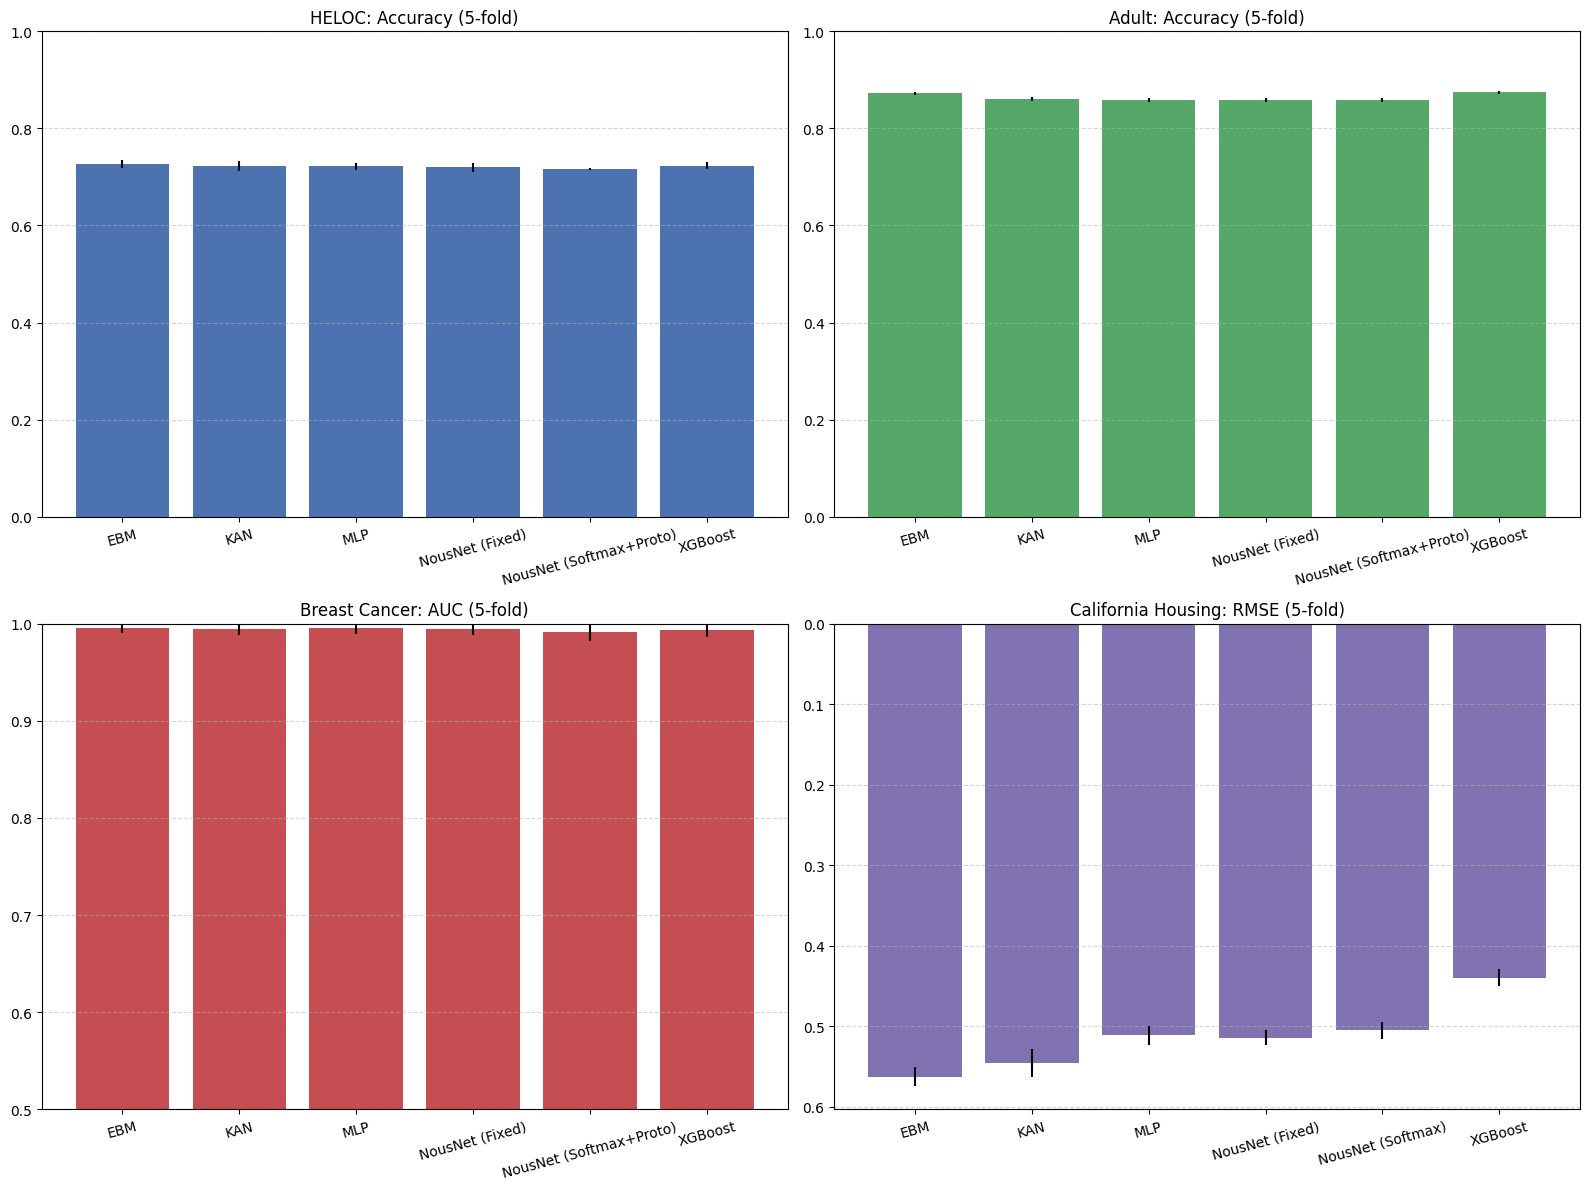

In [9]:
if not all_results.empty:
    def agg_metrics(df):
        return df.groupby(["dataset", "model", "metric"]).agg(
            mean=("value", "mean"),
            std=("value", "std"),
            mean_time_s=("time_s", "mean")
        ).reset_index()

    summary = agg_metrics(all_results)
    summary_nonan = summary.dropna(subset=["mean"]).copy()

    print(summary_nonan.to_string(index=False, float_format="%.4f"))

    # Quick plots
    datasets = summary_nonan["dataset"].unique()
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()

    # HELOC Accuracy
    if "HELOC" in datasets:
        s = summary_nonan[(summary_nonan.dataset=="HELOC") & (summary_nonan.metric=="Accuracy")]
        axes[0].bar(s["model"], s["mean"], yerr=s["std"], color="#4c72b0")
        axes[0].set_title("HELOC: Accuracy (5-fold)")
        axes[0].set_ylim(0, 1)
        axes[0].grid(True, axis="y", linestyle="--", alpha=0.5)
        axes[0].tick_params(axis='x', rotation=15)

    # Adult Accuracy
    if "Adult" in datasets:
        s = summary_nonan[(summary_nonan.dataset=="Adult") & (summary_nonan.metric=="Accuracy")]
        axes[1].bar(s["model"], s["mean"], yerr=s["std"], color="#55a868")
        axes[1].set_title("Adult: Accuracy (5-fold)")
        axes[1].set_ylim(0, 1)
        axes[1].grid(True, axis="y", linestyle="--", alpha=0.5)
        axes[1].tick_params(axis='x', rotation=15)

    # Breast Cancer AUC
    if "BreastCancer" in datasets:
        s = summary_nonan[(summary_nonan.dataset=="BreastCancer") & (summary_nonan.metric=="AUC")]
        axes[2].bar(s["model"], s["mean"], yerr=s["std"], color="#c44e52")
        axes[2].set_title("Breast Cancer: AUC (5-fold)")
        axes[2].set_ylim(0.5, 1)
        axes[2].grid(True, axis="y", linestyle="--", alpha=0.5)
        axes[2].tick_params(axis='x', rotation=15)

    # California RMSE
    if "California" in datasets:
        s = summary_nonan[(summary_nonan.dataset=="California") & (summary_nonan.metric=="RMSE")]
        axes[3].bar(s["model"], s["mean"], yerr=s["std"], color="#8172b2")
        axes[3].set_title("California Housing: RMSE (5-fold)")
        axes[3].invert_yaxis()  # lower is better
        axes[3].grid(True, axis="y", linestyle="--", alpha=0.5)
        axes[3].tick_params(axis='x', rotation=15)

    plt.tight_layout()
    plt.show()
else:
    print("No results to summarize.")

## Interpretability Showcase
Single held-out split per dataset to demonstrate:
- NousNet: honest LOO, MSE, fidelity-driven pruning, per-sample explanation; Softmax+Prototype: prototype analytics.
- XGBoost: SHAP global top features.
- EBM: global and local explanations.
- MLP: global permutation importance.
- KAN: global importance from learned bases.

In [10]:
def showcase_interpretability_classification(
    X: pd.DataFrame, y: pd.Series, feature_names: List[str], class_names: List[str], dataset_tag: str
):
    print("\n" + "="*100)
    print(f"Interpretability Showcase — {dataset_tag} (classification)")
    print("="*100)

    X_tr, X_te, y_tr, y_te = train_test_split(X.values, y.values, test_size=0.2, random_state=42, stratify=y.values)
    X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42, stratify=y_tr)

    # NousNet (Fixed)
    y_proba_fixed, info_fixed = fit_nous(
        X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="classification",
        epochs=1000, patience=200, batch_size=64, lr=1e-3,
        rule_method="fixed", use_calibrators=False, use_prototypes=False
    )
    y_pred_fixed = np.argmax(y_proba_fixed, axis=1)
    auc_fixed = safe_auc(y_te, y_proba_fixed)
    print(f"NousNet (Fixed) Accuracy: {accuracy_score(y_te, y_pred_fixed):.4f} | AUC: {auc_fixed:.4f}")

    # NousNet (Softmax + prototypes)
    y_proba_soft, info_soft = fit_nous(
        X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="classification",
        epochs=1000, patience=200, batch_size=64, lr=1e-3,
        rule_method="softmax", use_calibrators=True, use_prototypes=True
    )
    y_pred_soft = np.argmax(y_proba_soft, axis=1)
    auc_soft = safe_auc(y_te, y_proba_soft)
    print(f"NousNet (Softmax+Proto) Accuracy: {accuracy_score(y_te, y_pred_soft):.4f} | AUC: {auc_soft:.4f}")

    # XGBoost
    y_proba_xgb = fit_xgboost(X_tr, y_tr, X_val, y_val, X_te, "classification")
    y_pred_xgb = np.argmax(y_proba_xgb, axis=1)
    print(f"XGBoost Accuracy: {accuracy_score(y_te, y_pred_xgb):.4f} | AUC: {safe_auc(y_te, y_proba_xgb):.4f}")

    # EBM
    y_proba_ebm, ebm_model = fit_ebm(X_tr, y_tr, X_val, y_val, X_te, "classification")
    y_pred_ebm = np.argmax(y_proba_ebm, axis=1)
    print(f"EBM Accuracy: {accuracy_score(y_te, y_pred_ebm):.4f} | AUC: {safe_auc(y_te, y_proba_ebm):.4f}")

    # MLP
    mlp_model, _ = train_mlp(X_tr, y_tr, X_val, y_val, "classification", max_epochs=1000, patience=200, lr=1e-3, batch_size=64)
    y_proba_mlp = predict_mlp(mlp_model, X_te, "classification")
    y_pred_mlp = np.argmax(y_proba_mlp, axis=1)
    auc_mlp = safe_auc(y_te, y_proba_mlp)
    print(f"MLP Accuracy: {accuracy_score(y_te, y_pred_mlp):.4f} | AUC: {auc_mlp:.4f}")

    # KAN (binary only)
    if len(np.unique(y_tr)) == 2:
        kan_model, _ = train_manual_kan(
            X_tr, y_tr, X_val, y_val, task_type="classification",
            num_classes=2, K1=8, K2=8, M=16, lr=3e-3, weight_decay=1e-4, max_epochs=300, patience=50, batch_size=128
        )
        y_proba_kan = predict_manual_kan(kan_model, X_te, "classification")
        print(f"KAN Accuracy: {accuracy_score(y_te, np.argmax(y_proba_kan, axis=1)):.4f} | AUC: {safe_auc(y_te, y_proba_kan):.4f}")
        imp = kan_model.global_importance()
        order = np.argsort(-imp)[:10]
        print("KAN top-10 global features:")
        for j in order:
            print(f"  {feature_names[j]}: {imp[j]:.4f}")

    # Per-sample explanations with NousNet (Softmax+Proto)
    idx = 0
    print("\n— NousNet (Softmax+Proto) explanation (held-out sample) —")
    print(generate_enhanced_explanation(info_soft["model"], X_te[idx], y_te[idx], feature_names, class_names, use_pruning=False))
    t_prune = select_pruning_threshold_global_bs(info_soft["model"], X_val, target_fidelity=0.99, task_type="classification", max_samples=200, device=DEVICE)
    print("\nWith pruning:")
    print(generate_enhanced_explanation(info_soft["model"], X_te[idx], y_te[idx], feature_names, class_names, use_pruning=True, pruning_threshold=t_prune))

    # MSE + fidelity metrics
    fid = explanation_fidelity_metrics(info_soft["model"], X_te[idx], feature_names, class_names=class_names)
    print("\nNousNet explanation fidelity metrics:", fid)

    # Prototype analytics (global and per-sample)
    try:
        pr = prototype_report_global(info_soft["model"], X_tr, y=y_tr, class_names=class_names, top_k_rules=8, top_k_facts_per_rule=2, trace_to_base=True)
        print("\nPrototype report (top by top1_count):")
        pr_small = pr[["proto", "primary_class", "class_entropy", "mean_activation", "top1_count"]].sort_values("top1_count", ascending=False).head(5)
        print(pr_small.to_string(index=False))
        top_proto = int(pr_small.iloc[0]["proto"])
        print("\nDescribe best prototype:")
        print(describe_prototype(info_soft["model"], proto_id=top_proto, feature_names=feature_names, class_names=class_names, top_k_rules=8, top_k_facts_per_rule=2, trace_to_base=True))
        contrib_df = prototype_contribution_df(info_soft["model"], X_te[idx], class_names=class_names, top_k=5)
        print("\nPrototype contributions for the sample:")
        print(contrib_df.to_string(index=False))
    except Exception as e:
        print("Prototype analytics failed:", e)

    # XGBoost SHAP (global)
    print("\n— XGBoost SHAP (global) —")
    xgb_model = xgb.XGBClassifier(
        n_estimators=2000, learning_rate=0.03, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, tree_method="hist", n_jobs=0,
        eval_metric="logloss"
    )
    xgb_model.fit(X_tr, y_tr)
    expl = shap.TreeExplainer(xgb_model)
    shap_vals = expl.shap_values(X_te)
    if isinstance(shap_vals, list):
        sh = np.sum([np.abs(sv).mean(axis=0) for sv in shap_vals], axis=0)
    else:
        sh = np.abs(shap_vals).mean(axis=0)
    order = np.argsort(-sh)[:10]
    print("Top-10 global features by mean |SHAP|:")
    for i in order:
        print(f"  {feature_names[i]}: {sh[i]:.4f}")

    # EBM global and local
    print("\n— EBM (global & local) —")
    g = ebm_model.explain_global()
    try:
        imp = np.array(g.data()["overall"]["importance"])
        names = np.array(g.data()["overall"]["names"])
        order = np.argsort(-imp)[:10]
        print("Top-10 global EBM terms:")
        for i in order:
            print(f"  {names[i]}: {imp[i]:.4f}")
    except Exception as e:
        print("EBM global explain failed:", e)
    l = ebm_model.explain_local(X_te[idx:idx+1], [int(y_te[idx])])
    try:
        scores = l.data(0)["scores"]
        terms = l.data(0)["names"]
        order = np.argsort(-np.abs(scores))[:10]
        print("Top-10 local EBM contributions:")
        for i in order:
            print(f"  {terms[i]}: {scores[i]:+.4f}")
    except Exception as e:
        print("EBM local explain failed:", e)

    # MLP permutation importance (global)
    print("\n— MLP permutation importance (global) —")
    base_proba = predict_mlp(mlp_model, X_val, "classification")
    base_acc = accuracy_score(y_val, np.argmax(base_proba, axis=1))
    rng = np.random.default_rng(42)
    pi = []
    for j in range(X_val.shape[1]):
        Xv_perm = X_val.copy()
        rng.shuffle(Xv_perm[:, j])
        proba_perm = predict_mlp(mlp_model, Xv_perm, "classification")
        acc_perm = accuracy_score(y_val, np.argmax(proba_perm, axis=1))
        pi.append(base_acc - acc_perm)
    order = np.argsort(-np.array(pi))[:10]
    print("Top-10 features by permutation importance (ΔAccuracy):")
    for j in order:
        print(f"  {feature_names[j]}: {pi[j]:.4f}")


def showcase_interpretability_regression(
    X: pd.DataFrame, y: pd.Series, feature_names: List[str], dataset_tag: str
):
    print("\n" + "="*100)
    print(f"Interpretability Showcase — {dataset_tag} (regression)")
    print("="*100)

    X_tr, X_te, y_tr, y_te = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
    X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

    # NousNet (Fixed)
    y_pred_fixed, info_fixed = fit_nous(
        X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="regression",
        epochs=1000, patience=200, batch_size=64, lr=1e-3, rule_method="fixed", use_calibrators=False, use_prototypes=False
    )
    print(f"NousNet (Fixed): RMSE={rmse(y_te, y_pred_fixed):.4f} MAE={mean_absolute_error(y_te, y_pred_fixed):.4f} R²={r2_score(y_te, y_pred_fixed):.4f}")

    # NousNet (Softmax)
    y_pred_soft, info_soft = fit_nous(
        X_tr, y_tr, X_val, y_val, X_te, feature_names, task_type="regression",
        epochs=1000, patience=200, batch_size=64, lr=1e-3, rule_method="softmax", use_calibrators=True, use_prototypes=False
    )
    print(f"NousNet (Softmax): RMSE={rmse(y_te, y_pred_soft):.4f} MAE={mean_absolute_error(y_te, y_pred_soft):.4f} R²={r2_score(y_te, y_pred_soft):.4f}")

    # XGBoost
    y_pred_xgb = fit_xgboost(X_tr, y_tr, X_val, y_val, X_te, "regression")
    print(f"XGBoost: RMSE={rmse(y_te, y_pred_xgb):.4f} MAE={mean_absolute_error(y_te, y_pred_xgb):.4f} R²={r2_score(y_te, y_pred_xgb):.4f}")

    # EBM
    y_pred_ebm, ebm_model = fit_ebm(X_tr, y_tr, X_val, y_val, X_te, "regression")
    print(f"EBM: RMSE={rmse(y_te, y_pred_ebm):.4f} MAE={mean_absolute_error(y_te, y_pred_ebm):.4f} R²={r2_score(y_te, y_pred_ebm):.4f}")

    # MLP
    mlp_model, _ = train_mlp(X_tr, y_tr, X_val, y_val, "regression", max_epochs=1000, patience=200, lr=1e-3, batch_size=64)
    y_pred_mlp = predict_mlp(mlp_model, X_te, "regression")
    print(f"MLP: RMSE={rmse(y_te, y_pred_mlp):.4f} MAE={mean_absolute_error(y_te, y_pred_mlp):.4f} R²={r2_score(y_te, y_pred_mlp):.4f}")

    # KAN
    kan_model, _ = train_manual_kan(
        X_tr, y_tr, X_val, y_val, task_type="regression",
        num_classes=1, K1=8, K2=8, M=16, lr=3e-3, weight_decay=1e-4, max_epochs=300, patience=50, batch_size=64
    )
    y_pred_kan = predict_manual_kan(kan_model, X_te, "regression")
    print(f"KAN: RMSE={rmse(y_te, y_pred_kan):.4f} MAE={mean_absolute_error(y_te, y_pred_kan):.4f} R²={r2_score(y_te, y_pred_kan):.4f}")
    imp = kan_model.global_importance()
    order = np.argsort(-imp)[:10]
    print("KAN top-10 global features:")
    for j in order:
        print(f"  {feature_names[j]}: {imp[j]:.4f}")

    # Per-sample NousNet explanation (Softmax)
    idx = 0
    print("\n— NousNet (Softmax) explanation (held-out sample) —")
    print(generate_enhanced_explanation(info_soft["model"], X_te[idx], y_te[idx], feature_names, y_scaler=None, use_pruning=False))
    t_prune = select_pruning_threshold_global_bs(info_soft["model"], X_val, task_type="regression", tol_reg=0.05, max_samples=200, device=DEVICE)
    print("\nWith pruning:")
    print(generate_enhanced_explanation(info_soft["model"], X_te[idx], y_te[idx], feature_names, y_scaler=None, use_pruning=True, pruning_threshold=t_prune))

    # XGBoost SHAP (global)
    print("\n— XGBoost SHAP (global) —")
    xgb_model = xgb.XGBRegressor(
        n_estimators=2000, learning_rate=0.03, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, tree_method="hist", n_jobs=0,
        eval_metric="rmse"
    )
    xgb_model.fit(X_tr, y_tr)
    expl = shap.Explainer(xgb_model, X_tr)
    shap_vals = expl(X_te[:256])
    sv = np.abs(shap_vals.values).mean(axis=0)
    order = np.argsort(-sv)[:10]
    print("Top-10 global features by mean |SHAP|:")
    for i in order:
        print(f"  {feature_names[i]}: {sv[i]:.4f}")

    # EBM (global & local)
    print("\n— EBM (global & local) —")
    g = ebm_model.explain_global()
    try:
        imp_ebm = np.array(g.data()["overall"]["importance"])
        names = np.array(g.data()["overall"]["names"])
        order = np.argsort(-imp_ebm)[:10]
        print("Top-10 global EBM terms:")
        for i in order:
            print(f"  {names[i]}: {imp_ebm[i]:.4f}")
    except Exception as e:
        print("EBM global explain failed:", e)
    l = ebm_model.explain_local(X_te[idx:idx+1], [float(y_te[idx])])
    try:
        scores = l.data(0)["scores"]
        terms = l.data(0)["names"]
        order = np.argsort(-np.abs(scores))[:10]
        print("Top-10 local EBM contributions:")
        for i in order:
            print(f"  {terms[i]}: {scores[i]:+.4f}")
    except Exception as e:
        print("EBM local explain failed:", e)

    # MLP permutation importance (global - ΔRMSE)
    print("\n— MLP permutation importance —")
    base_pred = predict_mlp(mlp_model, X_val, "regression")
    base_rmse = rmse(y_val, base_pred)
    rng = np.random.default_rng(42)
    pi = []
    for j in range(X_val.shape[1]):
        Xv_perm = X_val.copy()
        rng.shuffle(Xv_perm[:, j])
        pred_perm = predict_mlp(mlp_model, Xv_perm, "regression")
        pi.append(base_rmse - rmse(y_val, pred_perm))
    order = np.argsort(-np.array(pi))[:10]
    print("Top-10 features by permutation importance (ΔRMSE positive = worse when permuted):")
    for j in order:
        print(f"  {feature_names[j]}: {pi[j]:.4f}")

### Run interpretability showcases

In [11]:
# HELOC
try:
    Xh, yh, f_h, c_h = load_heloc()
    showcase_interpretability_classification(Xh, yh, f_h, c_h, dataset_tag="HELOC")
except Exception as e:
    print("HELOC showcase skipped:", e)

# Adult
try:
    Xa, ya, f_a, c_a = load_adult()
    showcase_interpretability_classification(Xa, ya, f_a, c_a, dataset_tag="Adult")
except Exception as e:
    print("Adult showcase skipped:", e)

# Breast Cancer
try:
    Xb, yb, f_b, c_b = load_breast_cancer_ds()
    showcase_interpretability_classification(Xb, yb, f_b, c_b, dataset_tag="Breast Cancer")
except Exception as e:
    print("Breast Cancer showcase skipped:", e)

# California Housing
try:
    Xc, yc, f_c = load_california()
    showcase_interpretability_regression(Xc, yc, f_c, dataset_tag="California Housing")
except Exception as e:
    print("California showcase skipped:", e)

Loaded HELOC from https://raw.githubusercontent.com/benoitparis/explainable-challenge/refs/heads/master/heloc_dataset_v1.csv

Interpretability Showcase — HELOC (classification)
Epoch [1/1000] train=0.6141 val=0.5483 l0=0.0000 (*)
Epoch [2/1000] train=0.5638 val=0.5424 l0=0.0000 (*)
Epoch [5/1000] train=0.5574 val=0.5405 l0=0.0000 (*)
Epoch [6/1000] train=0.5557 val=0.5400 l0=0.0000 (*)
Epoch [7/1000] train=0.5559 val=0.5397 l0=0.0000 (*)
Epoch [10/1000] train=0.5537 val=0.5400 l0=0.0000
Epoch [15/1000] train=0.5497 val=0.5389 l0=0.0000 (*)
Epoch [16/1000] train=0.5476 val=0.5360 l0=0.0000 (*)
Epoch [20/1000] train=0.5449 val=0.5386 l0=0.0000
Epoch [30/1000] train=0.5339 val=0.5414 l0=0.0000
Epoch [40/1000] train=0.5245 val=0.5555 l0=0.0000
Epoch [50/1000] train=0.5136 val=0.5663 l0=0.0000
Epoch [60/1000] train=0.5046 val=0.5702 l0=0.0000
Epoch [70/1000] train=0.4930 val=0.5816 l0=0.0000
Epoch [80/1000] train=0.4859 val=0.5980 l0=0.0000
Epoch [90/1000] train=0.4789 val=0.6044 l0=0.0000


 98%|===================| 251/256 [00:13<00:00]        

Top-10 global features by mean |SHAP|:
  Latitude: 0.7412
  Longitude: 0.6361
  MedInc: 0.3137
  AveRooms: 0.1703
  AveOccup: 0.1684
  HouseAge: 0.0513
  Population: 0.0345
  AveBedrms: 0.0318

— EBM (global & local) —
EBM global explain failed: 'overall'
Top-10 local EBM contributions:
  feature_0000: -0.8318
  feature_0006: -0.4197
  feature_0005: -0.3253
  feature_0007: -0.1860
  feature_0002: +0.0268
  feature_0003: -0.0196
  feature_0004: -0.0118
  feature_0001: +0.0087

— MLP permutation importance —
Top-10 features by permutation importance (ΔRMSE positive = worse when permuted):
  Population: -0.0372
  HouseAge: -0.0997
  AveOccup: -0.2666
  MedInc: -0.4529
  AveBedrms: -0.6337
  AveRooms: -0.7554
  Longitude: -1.0230
  Latitude: -1.1624
